In [1]:
import matplotlib.pyplot as plt
import time
from statistics import median, mean, stdev
import pickle
import numpy as np
from sfiasm import datahandler
from sfiasm.world import determine_ree_price
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr, spearmanr, ttest_ind
from sfiasm.datahandler import acfplot
import seaborn as sns
from scipy.ndimage import uniform_filter1d
from sklearn import linear_model
import matplotlib
from scipy.stats import skew, kurtosis, pearsonr
matplotlib.rcParams['text.usetex'] = False

%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.facecolor'] = 'white'

In [9]:
with open('Data\SFI_ASM Objects xi_09.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

init_market = unserialized_data[0]
init_agents = unserialized_data[1]

In [3]:
file_string = 'Data/50 k run, 5 multiple_tau_df.pickle'

with open(file_string, 'rb') as handle:
    unserialized_data = pickle.load(handle)

In [4]:
multiple_tau_df = unserialized_data[0]
ga_agents = unserialized_data[1]
fracs = unserialized_data[2][0]['specific fracs']
profits = unserialized_data[2][0]['agent profits']
ga_profits = [profits[i]['ga'] for i in range(len(profits))]
trend_profits = [profits[i]['trend'] for i in range(len(profits))]

In [9]:
multiple_tau_df.columns

Index(['taus', 'price', 'dividend', 'ga profit', 'volume', 'pricecumdiv',
       'short tr profit', 'mid tr profit', 'long tr profit'],
      dtype='object')

In [17]:
# Save pd df to csv for use in R!
temp_df = pd.DataFrame(data=multiple_tau_df['pricecumdiv'][0][:], columns=['pricecumdiv'])
temp_df['pricecumdiv'].to_csv('Data/50 k run, 5 pricexumdiv.csv',index=False)

In [4]:
tehran_index = pd.read_excel('TehranIndex.xlsx')
tehran_prices = tehran_index['Value'].tolist()
tehran_prices = list(reversed(tehran_prices))

In [331]:
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [31]:
xdates = pd.date_range(start='02/20/2020', end='3/20/2021', periods=320)

<ipython-input-36-c1dc4ff4ca2e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['', '01/2020', '03/2020', '05/2020', '07/2020', '09/2020', '11/2020', '01/2021'])


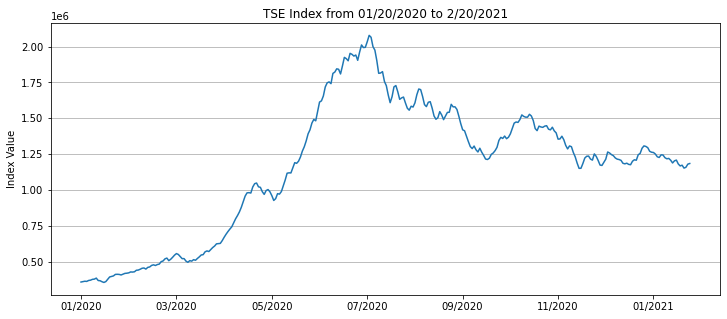

In [36]:
fig = plt.figure(figsize=[12,5])
plt.plot(tehran_prices)
plt.gca().set_xticklabels(['', '01/2020', '03/2020', '05/2020', '07/2020', '09/2020', '11/2020', '01/2021'])
plt.gca().xaxis.grid(False)
plt.ylabel('Index Value')
plt.title('TSE Index from 01/20/2020 to 2/20/2021')
plt.savefig('Pics/Tehran Index.png', dpi=150)

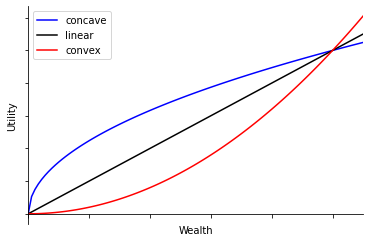

In [32]:
x = np.linspace(0,1.1,100)

# the function, which is y = x^2 here
y = x**2
z = np.sqrt(x)
w = x
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(False)
ax.set_xlim(0,1.1)
ax.set_xlabel('Wealth')
ax.set_ylabel('Utility')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.plot(x,z, 'b', label='concave')
plt.plot(x,w, 'black', label='linear')
plt.plot(x,y, 'r', label='convex')

plt.legend()
plt.savefig('Pics/Convex function utility.png', dpi=80)

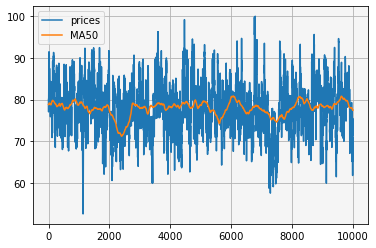

In [22]:
# plot moving average

plt.plot(init_market.priceTimeSeries[-10000:], label='prices')
plt.plot([init_market.calculate_ma('price', 500, history=i) for i in range(10000)], label = 'MA50')
plt.legend()
plt.grid()

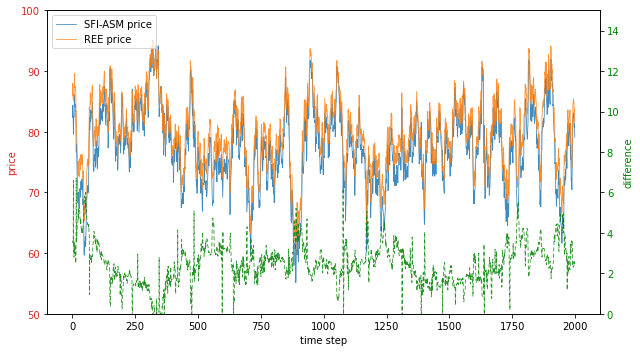

In [186]:
ree_prices = determine_ree_price(init_market.divTimeSeries[-2000:])

fig, ax1 = plt.subplots(figsize=[9,5])

color = 'tab:red'
ax1.set_xlabel('time step')
ax1.set_ylabel('price', color=color)
ax1.plot(init_market.priceTimeSeries[-2000:], label='SFI-ASM price', linewidth=0.8, alpha=0.85)
ax1.set_ylim(50, 100)
ax1.plot(ree_prices, label='REE price', linewidth=0.8, alpha=0.85)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('difference', color='g',)  # we already handled the x-label with ax1
ax2.set_ylim(0, 15)
ax2.plot(np.subtract(ree_prices, init_market.priceTimeSeries[-2000:]), ls=(0, (5,3)) 
         , color='g', linewidth=0.8, alpha=0.85 )
ax2.tick_params(axis='y', labelcolor='g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='upper left')
ax1.grid(False)
plt.grid(False)

plt.savefig('Pics/Difference between REE and SFI-ASM price.png', dpi=100)

In [8]:
residuals = report_stats(multiple_tau_df['price'][0][-10000:],
                                     multiple_tau_df['dividend'][0][-10000:],
                                     multiple_tau_df['volume'][0][-10000:])

std =  1.748603; returns kurtosis =  0.961751; rho = -0.424559; rho_squared =  0.294328
 ARCH = (1076.1566167129122, 7.84608280361164e-223, 100.39071052610979, 4.108426968148245e-236) 
 BDS = (array(7.40048309), array(1.35689949e-13)) 
 excess retrun =  5.644007 
 trading volume =  5.104242, price volatility =  5.993697, residuals kurtosis =  0.619806


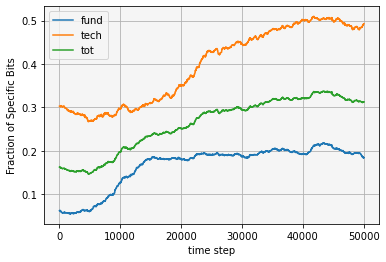

In [8]:
plt.plot(list(map(lambda x: x[0], fracs)), label='fund')
plt.plot(list(map(lambda x: x[1], fracs)), label='tech')
plt.plot(list(map(lambda x: x[2], fracs)), label='tot')
plt.ylabel('Fraction of Specific Bits')
plt.xlabel('time step')
plt.legend()
plt.grid()

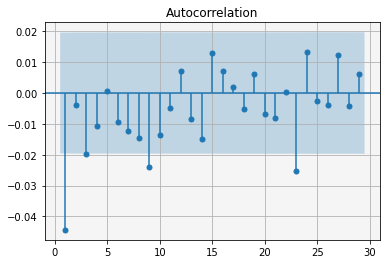

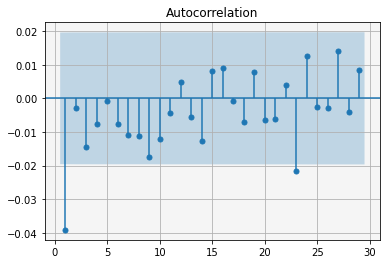

In [42]:
price = init_market.priceTimeSeries[-10000:]
div = init_market.divTimeSeries[-10000:]
lag = 1
x = []
for t in range(len(price) - lag):
    x.append(((price[t+lag] + div[t+lag]) / price[t]) - 1)
    
plot_acf(x, lags=np.arange(1,30))
z = plot_acf(np.array(x)**2, lags=np.arange(1,30))

In [79]:
datahandler.het_arch(res, nlags=1)

(44.28260754109284,
 2.8423029992384243e-11,
 44.47071657028574,
 2.7183903274156452e-11)

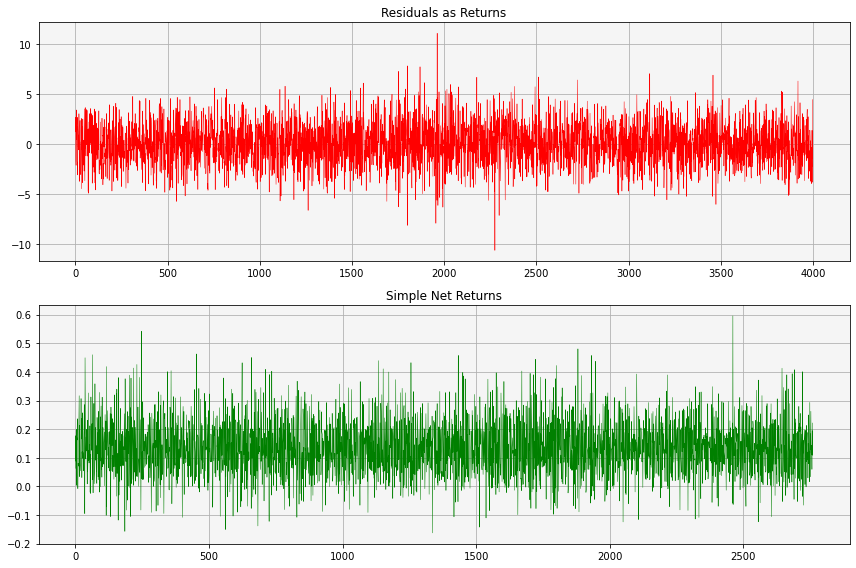

In [36]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(211)
ax.plot(res[2000:6000], c='r', linewidth=0.5)
ax.set_title('Residuals as Returns')
ax.grid()
ax2 = fig.add_subplot(212)
ax2.plot(x[2000:6000], c='g', linewidth=0.5)
ax2.set_title('Simple Net Returns')
ax2.grid()

plt.tight_layout()

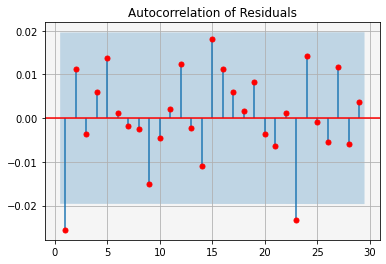

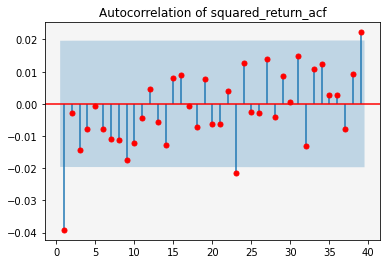

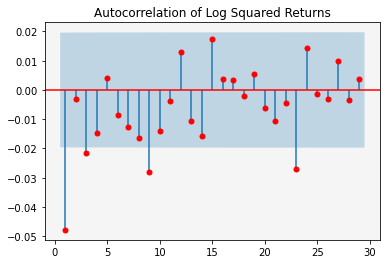

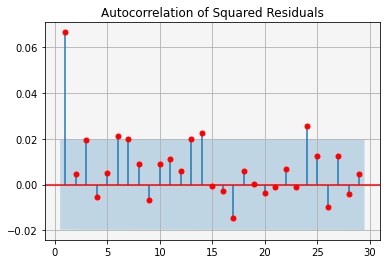

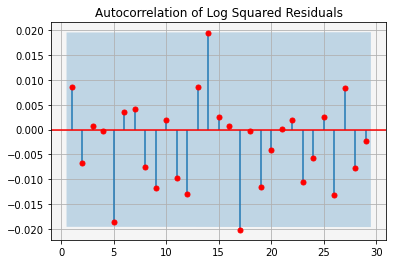

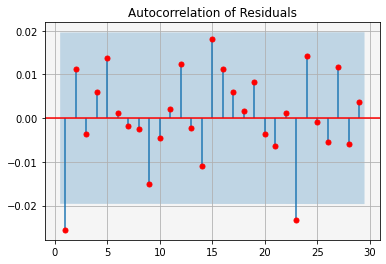

In [39]:
# Residuals are a better proxy for returns in the context of this model
# because a dividend is paid at each time step and using the simple net or gross
# return formulae will not give comparable results to actual stock markets.

datahandler.ACF_TYPE = 'ordinary'
datahandler.NUM_LAGS = 40
res = datahandler.find_residuals(np.add(init_market.priceTimeSeries[-10000:], init_market.divTimeSeries[-10000:]))

# datahandler.ACF_DECORATOR = False
# sq_ret = datahandler.squared_return(init_market.priceTimeSeries[-10000:], init_market.divTimeSeries[-10000:])
# abs_ret = datahandler.absolute_return(init_market.priceTimeSeries[-10000:], init_market.divTimeSeries[-10000:])

sq_ret = datahandler.squared_return(init_market.priceTimeSeries[-10000:], init_market.divTimeSeries[-10000:])
datahandler.squared_return_acf(init_market.priceTimeSeries[-10000:], init_market.divTimeSeries[-10000:])
plot_acf(np.log(sq_ret), lags=np.arange(1,30), title='Autocorrelation of Log Squared Returns', c='r')
plt.grid()
# datahandler.absolute_return(init_market.priceTimeSeries[-10000:], init_market.divTimeSeries[-10000:])

plot_acf(res**2, lags=np.arange(1,30), title='Autocorrelation of Squared Residuals', c='r')
plot_acf(np.log(res**2), lags=np.arange(1,30), title='Autocorrelation of Log Squared Residuals', c='r')
plot_acf(res, lags=np.arange(1,30), title='Autocorrelation of Residuals', c='r')

(array([-3, -2, -1,  0,  1,  2,  3]),
 array([0.48638976, 0.49332096, 0.62719077, 0.64071519, 0.52674319,
        0.47636127, 0.45544662]),
 <matplotlib.lines.Line2D at 0x21a647d0c70>)

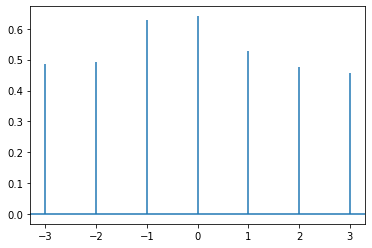

In [14]:
plt.xcorr(residuals ** 2, multiple_tau_df['volume'][0][-9999:], maxlags=3)

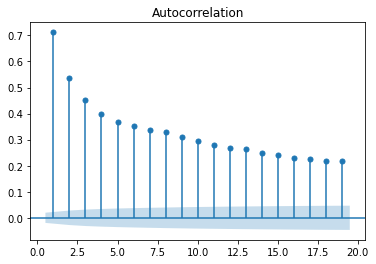

In [13]:
x = plot_acf(multiple_tau_df['volume'][0][-10000:], lags = np.arange(1,20)) 

Text(0, 0.5, 'Variance')

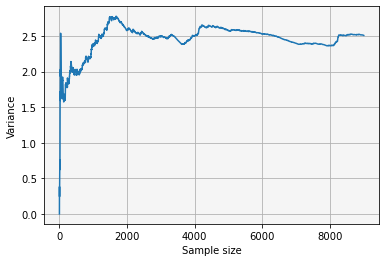

In [23]:
fig, ax = plt.subplots()
prices = multiple_tau_df['price'][0][-10000:]
ax.plot([np.var([prices[-10000 + i + 1] -  prices[-10000 + i] 
                 for i in range(j)]) for j in range(9000)])
apply_plot_settings(ax)
ax.set_xlabel('Sample size')
ax.set_ylabel('Variance')

Text(0, 0.5, 'Variance')

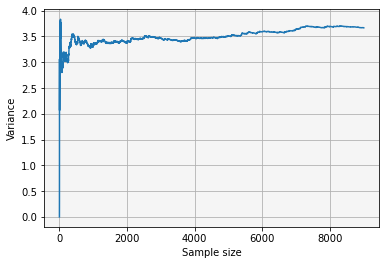

In [24]:
fig, ax = plt.subplots()
ax.plot([np.var([init_market.priceTimeSeries[-10000 + i + 1] -  init_market.priceTimeSeries[-10000 + i] 
                 for i in range(j)]) for j in range(9000)])
apply_plot_settings(ax)
ax.set_xlabel('Sample size')
ax.set_ylabel('Variance')

In [25]:
# leverage effect 

# The leverage effect refers to the observed tendency of an asset’s 
# volatility to be negatively correlated with the asset’s returns.

# Typically, rising asset prices are accompanied by 
# declining volatility, and vice versa.


prices_df = pd.DataFrame(init_market.priceTimeSeries[-10000:], columns=['prices'])
prices_std = prices_df.rolling(100).std()
prices_std.columns = ['std']
prices_df = prices_df.iloc[100:].join(prices_std.dropna()).reset_index(drop=True)


residuals = datahandler.find_residuals(np.add(init_market.priceTimeSeries[-10000:], 
                                              init_market.divTimeSeries[-10000:]))


In [64]:
# Correlation test to see the leverage effect
lag = 50
prices_df['price difference'] = [np.log(prices_df['prices'][i+lag]) - np.log(prices_df['prices'][i]) 
                                 for i in range(len(prices_df['prices']) - lag)] + [np.nan] * lag
prices_df['std difference'] = [np.log(prices_df['std'][i+lag]) - np.log(prices_df['std'][i]) 
                               for i in range(len(prices_df['std']) - lag)] + [np.nan] * lag
spearmanr(prices_df['price difference'].dropna(), prices_df['std difference'].dropna())


SpearmanrResult(correlation=-0.03044581155361942, pvalue=0.002511291834739792)

In [57]:
spearmanr(prices_df['price difference'].dropna(), residuals_diff[:-99])

SpearmanrResult(correlation=nan, pvalue=nan)

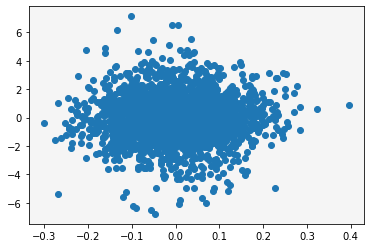

In [58]:
plt.scatter((prices_df['price difference'].dropna()), residuals_diff[:-99])

(array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6]),
 array([-1.85905053e-04, -2.47599353e-04, -2.32756682e-04, -1.19525004e-04,
        -2.39768110e-05,  1.04156749e-04,  1.85349390e-04,  9.63859638e-05,
         2.22000098e-04,  2.84505975e-04,  3.74136050e-04,  5.21393195e-04,
         7.09293038e-04]),
 <matplotlib.lines.Line2D at 0x2ae609d0a00>)

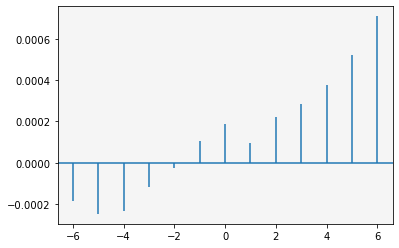

In [52]:
plt.xcorr(residuals[-9900:], prices_df['std'], maxlags=6)

In [53]:
spearmanr(residuals[-9900:], prices_df['std'])

SpearmanrResult(correlation=0.003834807235671264, pvalue=0.7028235722174645)

# Trend Regression Follower Stats

In the cells below, I will look into the statistics of trend regression followers.

In [7]:
# Short reg trenders
with open('Data\multiple_tau_df short regression trenders auto.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

s_dfs = unserialized_data[0]
s_params = unserialized_data[3]
s_regtrender = unserialized_data[2]

In [142]:
# Med Reg trenders
with open('Data\multiple_tau_df med regression trenders auto.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

m_dfs = unserialized_data[0]
m_params = unserialized_data[3]
m_regtrender = unserialized_data[2]

m_params.remove(m_params[1])
m_regtrender.remove(m_regtrender[1])

In [3]:
# Long Reg trenders
with open('Data\multiple_tau_df long regression trenders auto.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

l_dfs = unserialized_data[0]
l_params = unserialized_data[3]
l_regtrender = unserialized_data[2]

l_params.remove(l_params[1])
l_regtrender.remove(l_regtrender[1])

In [3]:
# Long + Med regressors
with open('Data\multiple_tau_df med + long regression trenders auto.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

ml_dfs = unserialized_data[0]
ml_params = unserialized_data[3]
ml_regtrender = unserialized_data[2]

In [4]:
# s + m + l regressors
with open('Data\multiple_tau_df short + med + long regression trenders auto.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

sml_dfs = unserialized_data[0]
sml_params = unserialized_data[3]
sml_regtrender = unserialized_data[2]

In [2]:
# s ewma regressors
with open('Data\multiple_tau_df s regression trenders ewma xi_09.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

sema_dfs = unserialized_data[0]
sema_ga = unserialized_data[1]
sema_params = unserialized_data[3]
sema_regtrender = unserialized_data[2]

In [3]:
with open('Data\multiple_tau_df m regression trenders ewma xi_09.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

mema_dfs = unserialized_data[0]
mema_ga = unserialized_data[1]
mema_params = unserialized_data[3]
mema_regtrender = unserialized_data[2]

In [4]:
with open('Data\multiple_tau_df l regression trenders ewma xi_09.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

lema_dfs = unserialized_data[0]
lema_ga = unserialized_data[1]
lema_params = unserialized_data[3]
lema_regtrender = unserialized_data[2]

In [125]:
residuals = datahandler.report_stats(init_market.priceTimeSeries[-20000:-10000],
             init_market.divTimeSeries[-20000:-10000],
             short_dfs[3]['volume'][0][-10000:])

std =  2.036843; returns kurtosis =  0.261891; rho =  0.003933; rho_squared =  0.010925
 ARCH = (11.411664632641598, 0.4940067351980729, 0.95091596113289, 0.49413078028294677) 
 BDS = (array(0.14235059), array(0.88680309)) 
 excess retrun =  2.738137 
 trading volume =  3.121121, price volatility =  5.701347, residuals kurtosis =  0.169749


In [14]:
residuals = datahandler.report_stats(y_train, X_train, priceseries, divseries,
                                     ml_dfs[3]['volume'][0][-10000:])

std =  1.912701; returns kurtosis =  1.712484; rho = -0.014312; rho_squared =  0.133957
 ARCH = (236.9920994174432, 7.009954529129842e-44, 20.2051727867129, 1.9320302770162864e-44) 
 BDS = (array(3.12585838), array(0.00177287)) 
 excess retrun =  2.453559 
 trading volume =  3.121121, price volatility =  5.935757, residuals kurtosis =  1.712234


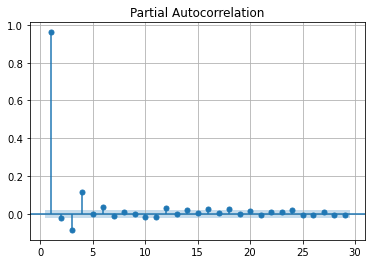

In [24]:
_ = plot_pacf(sema_dfs[0]['price'][0][-20000:-10000], lags=np.arange(1,30))

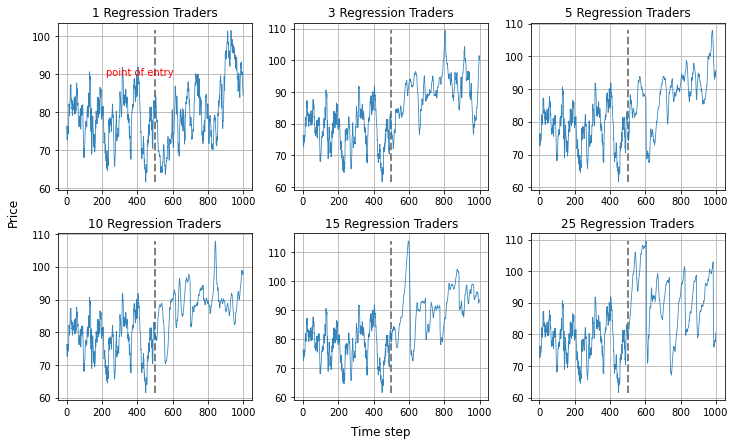

In [237]:
# Plot price time series
dfs = lema_dfs
fig = plt.figure(figsize=[10, 6])
for im in range(len(dfs)):
    ax = fig.add_subplot(2,3,im + 1)
    ax.plot(dfs[im]['price'][0][:1000], alpha=0.9, linewidth=0.8)
    ax.vlines(x=500, 
              ymin=min(dfs[im]['price'][0][:1000]), 
              ymax=max(dfs[im]['price'][0][:1000]), 
              color='grey', linewidth=2, ls='--')
    ax.set_title(f'{len(sema_regtrender[im])} Regression Traders')
    if im == 0:
        ax.text(0.42, 0.7, 'point of entry', c='r', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes)
        
fig.text(-.01, 0.5, 'Price', va='center', ha='center', rotation='vertical',fontsize = 12)
fig.text(0.5, -.01, 'Time step', va='center', ha='center',fontsize = 12)
plt.tight_layout()
# plt.savefig('Pics\short reg trenders price series after introduction', dpi=100, bbox_inches='tight')

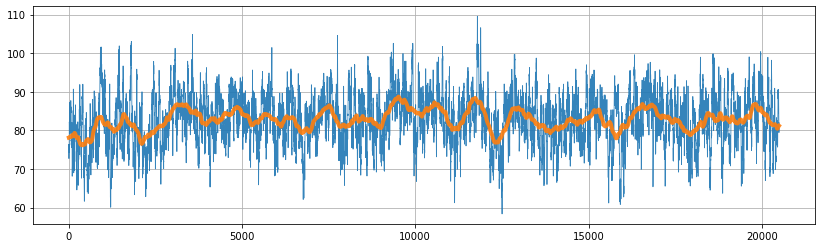

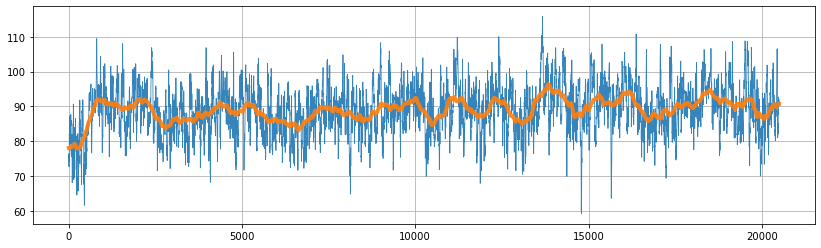

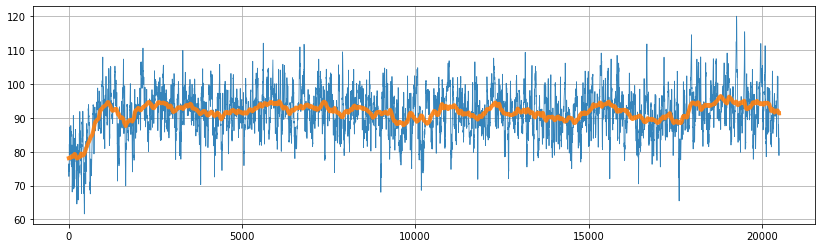

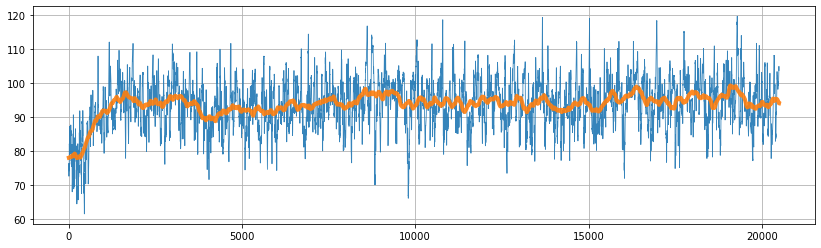

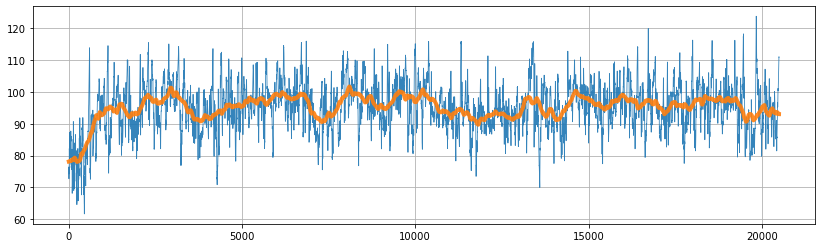

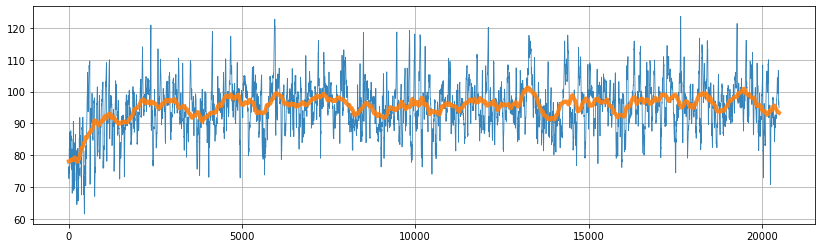

In [238]:
for im in range(6):
    fig = plt.figure(figsize=[14, 4])
    plt.plot(dfs[im]['price'][0][:], alpha=0.9, linewidth=0.8)
    plt.plot(uniform_filter1d(dfs[im]['price'][0][:], 500), alpha=0.9, linewidth=4)

In [29]:
# check for trends in the above

def autocorrelation(x):
    if type(x) != np.ndarray:
        x = np.array(x)
    assert(len(x.shape) == 1)
    n = x.shape[0]
    x -= x.mean()
    trans = np.fft.fft(x, n=n * 2)
    acf = np.fft.ifft(trans * np.conjugate(trans))[:n]
    acf /= acf[0]
    return np.real(acf)

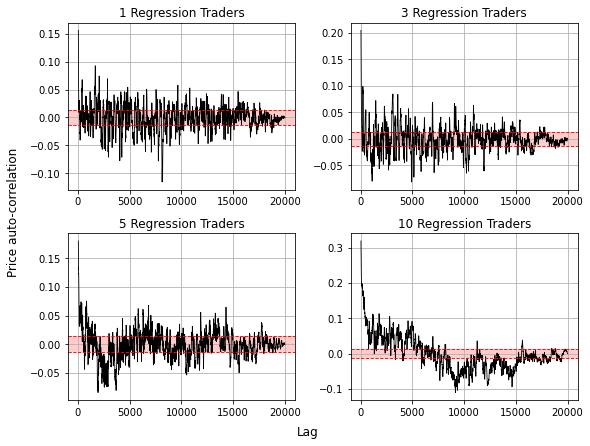

In [33]:
fig = plt.figure(figsize=(8,6))
dfs = sema_dfs
for i in range(4):
    acf = autocorrelation(dfs[i]['price'][0][500:])
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(np.arange(40, 20000), acf[40:], c='black', linewidth=0.8)
    ax.axhline(y=1.96/np.sqrt(len(dfs[i]['price'][0])),color='r', ls='--', lw=0.9)
    ax.axhspan(1.96/np.sqrt(len(dfs[i]['price'][0])), 
                -1.96/np.sqrt(len(dfs[i]['price'][0])), color='r', alpha=0.2, lw=0)
    ax.set_title(f'{len(sema_regtrender[i])} Regression Traders')
    ax.axhline(y=-1.96/np.sqrt(len(dfs[i]['price'][0])), color='r', ls='--', lw=0.9)
#     if i == 3:
#         ax.axvspan(2700, 5700, alpha=0.2, color='green')
#         ax.axvspan(6500, 11500, alpha=0.3, color='gold')
        
plt.tight_layout()
fig.text(-.01, 0.5, 'Price auto-correlation', va='center', ha='center', rotation='vertical',fontsize = 12)
fig.text(0.5, -.01, 'Lag', va='center', ha='center',fontsize = 12)
plt.savefig('Pics/Autocorrelation sema xi_09.png', dpi=80, bbox_inches='tight')

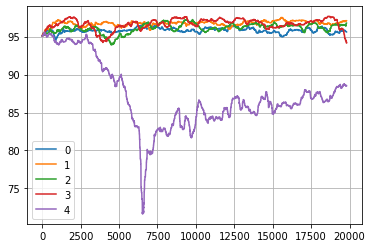

In [27]:
# compute fitnesses of ga agents with short horizon traders

for i in range(5):
    plt.plot([np.mean(sema_params[i][0]['agent strengths'][d]['ga']) 
              for d in range(len(sema_params[i][0]['agent strengths']))], label=str(i))
    
plt.legend()
    

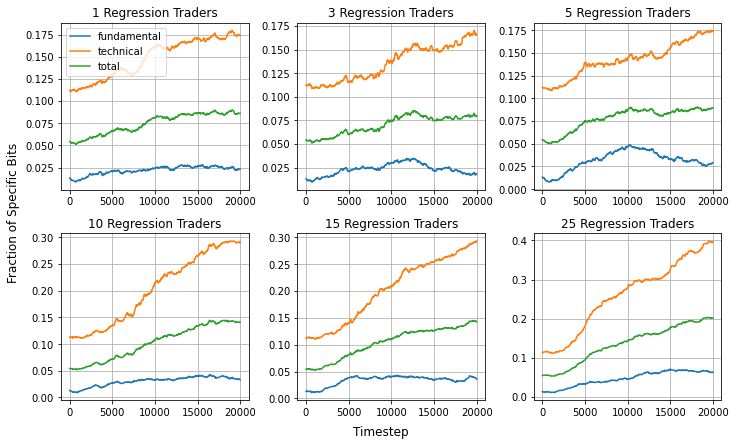

In [8]:
# plot specific fracs for above
agent_params = mema_params
fig = plt.figure(figsize=(10,6))
steps=20000
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    ax.plot(np.arange(0, steps, 20), [agent_params[i][0]['specific fracs'][sp]['ga'][0] 
                for sp in range(len(agent_params[i][0]['specific fracs']))], label='fundamental')
    ax.plot(np.arange(0, steps, 20), [agent_params[i][0]['specific fracs'][sp]['ga'][1] 
                for sp in range(len(agent_params[i][0]['specific fracs']))], label='technical')
    ax.plot(np.arange(0, steps, 20), [agent_params[i][0]['specific fracs'][sp]['ga'][2] 
                for sp in range(len(agent_params[i][0]['specific fracs']))], label='total')
    ax.set_title(f'{len(sema_regtrender[i])} Regression Traders')
    if i == 0:
        ax.legend()
fig.text(-.01, 0.5, 'Fraction of Specific Bits', va='center', ha='center', rotation='vertical',fontsize = 12)
fig.text(0.5, -.01, 'Timestep', va='center', ha='center',fontsize = 12)
plt.tight_layout()

plt.savefig('Pics/Specbit fractions mema xi_09.png', dpi=80, bbox_inches='tight')

<ipython-input-196-eb755cc01706>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


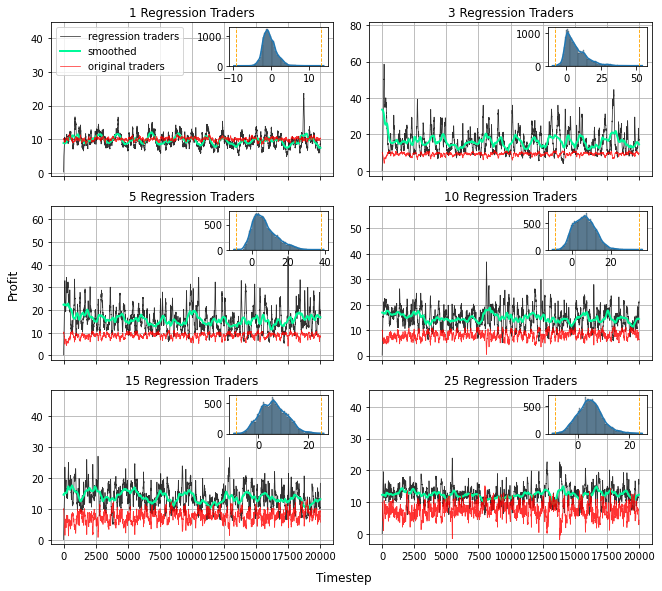

In [196]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

params = lema_params
dfs = lema_dfs
trenders = lema_regtrender

fig = plt.figure(figsize = [9,8])

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    mean_trend = [np.mean(params[i][0]['agent profits'][k]['trend']) 
             for k in range(len(params[i][0]['agent profits']))]
    mean_ga = [np.mean(params[i][0]['agent profits'][k]['ga']) 
             for k in range(len(params[i][0]['agent profits']))]
    
    ax.plot(mean_trend, linewidth=0.75, alpha=0.8, 
            label='regression traders', color='black')
    ax.plot(uniform_filter1d(mean_trend, 600), linewidth=2, alpha=1, color='mediumspringgreen', label='smoothed')
    ax.plot(mean_ga, linewidth=0.75, alpha=0.8, 
            label='original traders', color='red')
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + 20)

    location = 'upper right'
    axins = inset_axes(ax, width="35%", height="25%", loc=location)
    mean_difference_data = np.subtract(mean_trend, mean_ga)
    axins.grid(False)
    inset = sns.histplot(pd.DataFrame(mean_difference_data, columns=['Profit Difference']), 
                              kde=True, color='red', ax=axins, legend=False, bins=100)
    
    # Draw HDI
    x_axis_data_interval = (max(mean_difference_data) - min(mean_difference_data))/100
    x_axis_data = np.arange(min(mean_difference_data), max(mean_difference_data), x_axis_data_interval)
    
    kde_x, kde_y = inset.lines[0].get_data()
    p1 = axins.axvline(x=np.percentile(x_axis_data, 2.5),color='orange', ls='--', lw=0.9)
    p2 = axins.axvline(x=np.percentile(x_axis_data, 97.5),color='orange', ls='--', lw=0.9)
#     inset.fill_between(kde_x, kde_y, 
#                     where=(kde_x>np.percentile(x_axis_data, 2.5)) | (kde_x<np.percentile(x_axis_data, 97.5)) , 
#                 interpolate=True, color='orange', alpha=0.7)
    
    
    axins.set_xlabel(None)
    axins.set_ylabel(None)
    
    # Custom stuff
#     if i == 1:
#         axins.set_xticks([0, -5, -10])
#     elif i == 3:
#         axins.set_xticks([0, -5, -10, -15])
#     #
    ax.set_title(f'{len(trenders[i])} Regression Traders')
    if i == 0:
        ax.legend(loc='upper left')

    if i in [0,1,2,3]:
        ax.set_xticklabels([])


plt.tight_layout()
fig.text(-.01, 0.5, 'Profit', va='center', ha='center', rotation='vertical',fontsize = 12)
fig.text(0.5, -.01, 'Timestep', va='center', ha='center',fontsize = 12)
plt.savefig('Pics/regression follower profit l EMA xi_09.png', dpi=100, bbox_inches='tight')

In [7]:
sema_params[3][0]['demands'][0]['trend']

[2.0109504566807423,
 -1.054282662500235,
 -1.1292159817665275,
 -1.054282662500235,
 -0.5482764388118608,
 3.210444416118606,
 -0.5482764388118608,
 3.627538345943014,
 -0.28836349582929033,
 -0.5482764388118608]

In [17]:
# Look at individual sema demands

demands_std_10 = [np.std([sema_params[3][0]['demands'][j]['trend'][i] for j in range(20000)]) for i in range(10)]
demands_std_5 = [np.std([sema_params[2][0]['demands'][j]['trend'][i] for j in range(20000)]) for i in range(5)]
demands_std_3 = [np.std([sema_params[1][0]['demands'][j]['trend'][i] for j in range(20000)]) for i in range(3)]

In [20]:
print(np.median(demands_std_10))
print(np.median(demands_std_5))
print(np.median(demands_std_3))

1.2547792128535478
1.8249143094833133
1.855484731089552


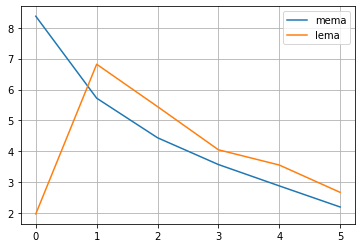

In [278]:
stds_mema = [np.std([np.mean(mema_params[i][0]['agent profits'][d]['trend']) for d in range(20000)]) for i in range(6)]
stds_lema = [np.std([np.mean(lema_params[i][0]['agent profits'][d]['trend']) for d in range(20000)]) for i in range(6)]

plt.plot(stds_mema, label='mema')
plt.plot(stds_lema, label='lema')
plt.legend()

In [276]:
np.std([np.mean(mema_params[5][0]['demands'][d]['trend']) for d in range(20000)])

0.8594956926571153

In [275]:
pearsonr(mema_dfs[5]['price'][0][500:], [np.mean(mema_params[5][0]['demands'][d]['trend']) for d in range(20000)])

(-0.021019261625829837, 0.0029517831733087774)

In [222]:
# Look into which GA agents are better and which are worse in the last market

params=lema_params
GA_profits_separate = [[params[5][0]['agent profits'][k]['ga'][i] for k in range(20000)] for i in range(25)]


worse_ind = np.argsort(np.mean(GA_profits_separate, axis=1))[:5]
best_ind = np.argsort(np.mean(GA_profits_separate, axis=1))[-5:]
worse_ga = [mema_ga[5][0][i] for i in worse_ind]
best_ga =  [mema_ga[5][0][i] for i in best_ind]

In [118]:
def rolldiff(array, window):
    return [array[i+window] - array[i] for i in range(len(array) - window)] + [np.nan] * window

In [223]:
mean_best_demands = np.mean([[params[5][0]['demands'][k]['ga'][i] for k in range(20000)] 
                             for i in best_ind], axis=0).tolist()
mean_worst_demands = np.mean([[params[5][0]['demands'][k]['ga'][i] for k in range(20000)] 
                              for i in worse_ind], axis=0).tolist()
mean_worst_profits = np.mean([[params[5][0]['agent profits'][k]['ga'][i] for k in range(20000)] 
                              for i in worse_ind], axis=0).tolist()
mean_best_profits = np.mean([[params[5][0]['agent profits'][k]['ga'][i] for k in range(20000)] 
                              for i in best_ind], axis=0).tolist()
mean_worst_holdings = np.mean([[params[5][0]['holdings'][k]['ga'][i] for k in range(20000)] 
                              for i in worse_ind], axis=0).tolist()
mean_best_holdings = np.mean([[params[5][0]['holdings'][k]['ga'][i] for k in range(20000)] 
                              for i in best_ind], axis=0).tolist()
worst_holding_rolldif = rolldiff(mean_worst_holdings, 100)
best_holding_rolldif = rolldiff(mean_best_holdings, 100)

df = pd.DataFrame({'demands': mean_worst_demands + mean_best_demands,
                   'profits': mean_worst_profits + mean_best_profits,
                   'holdings': mean_worst_holdings + mean_best_holdings,
                   'diff holdings': worst_holding_rolldif + best_holding_rolldif,
                   'trader type': ['worst'] * 20000 + ['best'] * 20000})

Text(0, 0.5, 'worst')

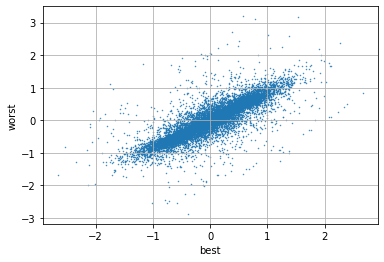

In [224]:
plt.scatter(mean_best_demands, mean_worst_demands, s=0.2)
plt.xlabel('best')
plt.ylabel('worst')

In [22]:
kurtosis(best_holding_rolldif, nan_policy='omit')

0.038263262427585154

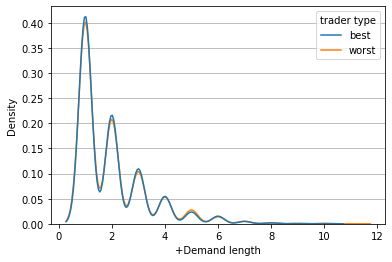

In [226]:
# Length of positive demands of best vs worst agents:

pos_neg_best_demands = [True if mean_best_demands[i] >= 0 else False for i in range(len(mean_best_demands))]
pos_neg_worst_demands = [True if mean_worst_demands[i] >= 0 else False for i in range(len(mean_worst_demands))]

# count length of positives
lengths_pos_best = []
lengths_pos_worst = []
cnt = 0
for i in range(len(pos_neg_best_demands)):
    if not pos_neg_best_demands[i]:
        cnt += 1
    else:
        lengths_pos_best.append(cnt)
        cnt = 0
        
for i in range(len(pos_neg_worst_demands)):
    if not pos_neg_worst_demands[i]:
        cnt += 1
    else:
        lengths_pos_worst.append(cnt)
        cnt = 0

# remove zeros
lengths_pos_best = [i for i in lengths_pos_best if i != 0] 
lengths_pos_worst = [i for i in lengths_pos_worst if i != 0] 

# add to new df
length_demand_df = pd.DataFrame({'+Demand length': lengths_pos_best + lengths_pos_worst,
                                 'trader type': ['best'] * len(lengths_pos_best) + 
                                 ['worst'] * len(lengths_pos_worst)
                                })

%matplotlib inline
g = sns.kdeplot(data=length_demand_df, x='+Demand length', hue='trader type')
g.xaxis.grid(False)

In [218]:
df

demands    profits  holdings  diff holdings trader type
0      0.016104  10.021957  0.992015      -1.222888       worst
1     -0.086071  10.023864  0.905944      -1.354129       worst
2     -0.039806  10.010486  0.866137      -1.404987       worst
3     -0.115262   9.982998  0.750875      -1.190117       worst
4     -0.092124   9.930076  0.658751      -0.980882       worst
...         ...        ...       ...            ...         ...
39995 -0.013136   9.077382  1.864257            NaN        best
39996  0.485162   9.461287  2.349419            NaN        best
39997 -1.378191   9.789834  0.971041            NaN        best
39998  1.139473   9.786833  2.106179            NaN        best
39999 -0.061536  10.069193  2.044431            NaN        best

[40000 rows x 5 columns]

In [217]:
# mean_worst_demands
# mean_best_demands 


# mean_worst_profits 
# mean_best_profits 

# mean_worst_holdings
# mean_best_holdings 

# worst_holding_rolldif
# best_holding_rolldif 

print(mean(mean_worst_demands), mean(mean_best_demands ))
print(np.std(mean_worst_demands), np.std(mean_best_demands ))
print(kurtosis(mean_worst_demands), kurtosis(mean_best_demands ))
print(skew(mean_worst_demands), skew(mean_best_demands ))
print('\n')

print(mean(mean_worst_profits ), mean(mean_best_profits ))
print(np.std(mean_worst_profits ), np.std(mean_best_profits ))
print(kurtosis(mean_worst_profits ), kurtosis(mean_best_profits ))
print(skew(mean_worst_profits ), skew(mean_best_profits ))
print('\n')

print(mean(mean_worst_holdings), mean(mean_best_holdings ))
print(np.std(mean_worst_holdings), np.std(mean_best_holdings ))
print(kurtosis(mean_worst_holdings), kurtosis(mean_best_holdings ))
print(skew(mean_worst_holdings), skew(mean_best_holdings ))
print('\n')
worst_holding_rolldif = np.array(worst_holding_rolldif)
best_holding_rolldif = np.array(best_holding_rolldif)                               
worst_holding_rolldif = worst_holding_rolldif[~np.isnan(worst_holding_rolldif)]
best_holding_rolldif = best_holding_rolldif[~np.isnan(best_holding_rolldif)]

print(mean(worst_holding_rolldif), mean(best_holding_rolldif ))
print(np.std(worst_holding_rolldif), np.std(best_holding_rolldif ))
print(kurtosis(worst_holding_rolldif), kurtosis(best_holding_rolldif ))
print(skew(worst_holding_rolldif), skew(best_holding_rolldif ))

0.004631670866980287 0.0052139513015155
0.3344901763583008 0.3965917000260781
8.537749263372081 6.947811997134785
0.5423206601922779 0.6046750156894402


8.329784904237327 11.850190861037346
1.88975798528398 2.580444935020495
0.21183258479397304 0.39380841126954325
-0.13517946391804062 0.14685564479830382


0.8019009469567902 1.1500480129471429
0.6504711409772393 0.8139409719978198
0.29533260978414644 0.14632261441413608
-0.07153039530459171 -0.02624753432459173


0.0016111618232513068 0.0021764700183916695
0.921299216567351 1.142879618063251
0.3526582018604212 0.038263262427585154
-0.03600806644954022 0.0017361574905326732


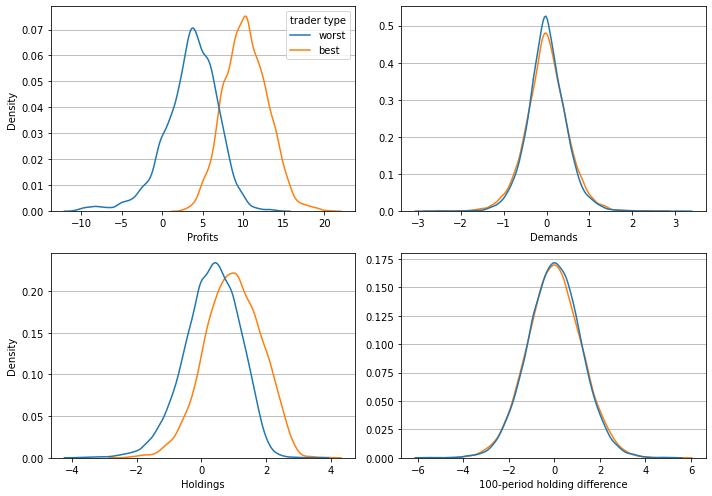

In [228]:
# Best and worst GA params a and b

fig, axes = plt.subplots(2,2, figsize=[10,7])

g = sns.kdeplot(ax = axes[0,0], data=df, x='profits', hue='trader type')
g.set_xlabel('Profits')
g.xaxis.grid(False)

g = sns.kdeplot(ax = axes[0,1], data=df, x='demands', hue='trader type')
g.set_xlabel('Demands')
g.xaxis.grid(False)
g.set_ylabel(None)
g.legend_ = None

g = sns.kdeplot(ax = axes[1,0], data=df, x='holdings', hue='trader type')
g.set_xlabel('Holdings')
g.xaxis.grid(False)
g.legend_ = None

g = sns.kdeplot(ax = axes[1,1], data=df, x='diff holdings', hue='trader type')
g.set_xlabel('100-period holding difference')
g.xaxis.grid(False)
g.set_ylabel(None)
g.legend_ = None

plt.tight_layout()

# plt.savefig('Pics/worst vs best GA traders in mema 25 market stats.png', dpi=100)

In [201]:
# import original traders and look at same stats as above

# init market more stuff 
with open('Data/SFI_ASM Objects xi_09 more saved stuff', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    
market = unserialized_data[0]
ga_agents = unserialized_data[1]
ga_params = unserialized_data[2]

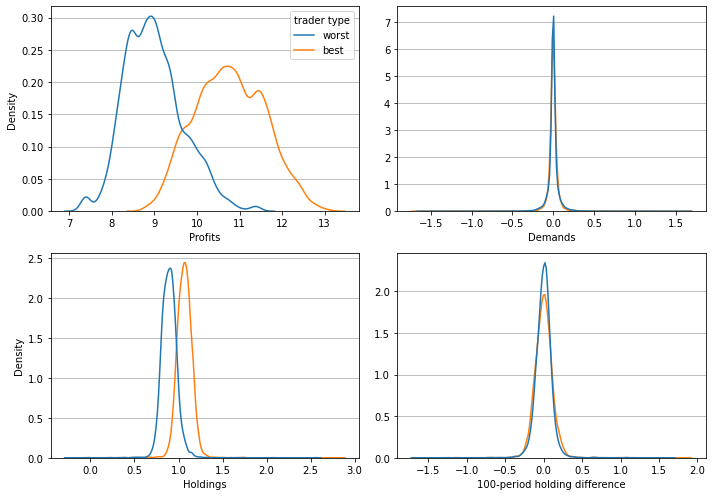

In [219]:
params=ga_params
GA_profits_separate = [[params['agent profits'][k]['ga'][i] for k in range(140000, 150000)] for i in range(25)]


worse_ind = np.argsort(np.mean(GA_profits_separate, axis=1))[:5]
best_ind = np.argsort(np.mean(GA_profits_separate, axis=1))[-5:]
worse_ga = [ga_agents[i] for i in worse_ind]
best_ga =  [ga_agents[i] for i in best_ind]


mean_best_demands = np.mean([[params['demands'][k]['ga'][i] for k in range(140000, 150000)] 
                             for i in best_ind], axis=0).tolist()
mean_worst_demands = np.mean([[params['demands'][k]['ga'][i] for k in range(140000, 150000)] 
                              for i in worse_ind], axis=0).tolist()
mean_worst_profits = np.mean([[params['agent profits'][k]['ga'][i] for k in range(140000, 150000)] 
                              for i in worse_ind], axis=0).tolist()
mean_best_profits = np.mean([[params['agent profits'][k]['ga'][i] for k in range(140000, 150000)] 
                              for i in best_ind], axis=0).tolist()
mean_worst_holdings = np.mean([[params['holdings'][k]['ga'][i] for k in range(140000, 150000)] 
                              for i in worse_ind], axis=0).tolist()
mean_best_holdings = np.mean([[params['holdings'][k]['ga'][i] for k in range(140000, 150000)] 
                              for i in best_ind], axis=0).tolist()
worst_holding_rolldif = rolldiff(mean_worst_holdings, 100)
best_holding_rolldif = rolldiff(mean_best_holdings, 100)

df = pd.DataFrame({'demands': mean_worst_demands + mean_best_demands,
                   'profits': mean_worst_profits + mean_best_profits,
                   'holdings': mean_worst_holdings + mean_best_holdings,
                   'diff holdings': worst_holding_rolldif + best_holding_rolldif,
                   'trader type': ['worst'] * 10000 + ['best'] * 10000})

fig, axes = plt.subplots(2,2, figsize=[10,7])

g = sns.kdeplot(ax = axes[0,0], data=df, x='profits', hue='trader type')
g.set_xlabel('Profits')
g.xaxis.grid(False)

g = sns.kdeplot(ax = axes[0,1], data=df, x='demands', hue='trader type')
g.set_xlabel('Demands')
g.xaxis.grid(False)
g.set_ylabel(None)
g.legend_ = None

g = sns.kdeplot(ax = axes[1,0], data=df, x='holdings', hue='trader type')
g.set_xlabel('Holdings')
g.xaxis.grid(False)
g.legend_ = None

g = sns.kdeplot(ax = axes[1,1], data=df, x='diff holdings', hue='trader type')
g.set_xlabel('100-period holding difference')
g.xaxis.grid(False)
g.set_ylabel(None)
g.legend_ = None

plt.tight_layout()
plt.savefig('Pics/worst vs best GA traders original SFI-ASM.png', dpi=100)

In [220]:
print(mean(mean_worst_demands), mean(mean_best_demands ))
print(np.std(mean_worst_demands), np.std(mean_best_demands ))
print(kurtosis(mean_worst_demands), kurtosis(mean_best_demands ))
print(skew(mean_worst_demands), skew(mean_best_demands ))
print('\n')

print(mean(mean_worst_profits ), mean(mean_best_profits ))
print(np.std(mean_worst_profits ), np.std(mean_best_profits ))
print(kurtosis(mean_worst_profits ), kurtosis(mean_best_profits ))
print(skew(mean_worst_profits ), skew(mean_best_profits ))
print('\n')

print(mean(mean_worst_holdings), mean(mean_best_holdings ))
print(np.std(mean_worst_holdings), np.std(mean_best_holdings ))
print(kurtosis(mean_worst_holdings), kurtosis(mean_best_holdings ))
print(skew(mean_worst_holdings), skew(mean_best_holdings ))
print('\n')
worst_holding_rolldif = np.array(worst_holding_rolldif)
best_holding_rolldif = np.array(best_holding_rolldif)                               
worst_holding_rolldif = worst_holding_rolldif[~np.isnan(worst_holding_rolldif)]
best_holding_rolldif = best_holding_rolldif[~np.isnan(best_holding_rolldif)]

print(mean(worst_holding_rolldif), mean(best_holding_rolldif ))
print(np.std(worst_holding_rolldif), np.std(best_holding_rolldif ))
print(kurtosis(worst_holding_rolldif), kurtosis(best_holding_rolldif ))
print(skew(worst_holding_rolldif), skew(best_holding_rolldif ))

-2.4618856386562312e-05 1.4006353655862715e-05
0.0861947713536012 0.07324724348908518
96.0406168975245 113.222833080015
0.2467480311441047 -0.39299825286623435


8.987377763031631 10.768649164643925
0.6873458597671429 0.8140985193044742
0.27308022752053285 -0.583498091425751
0.484278927344497 0.08357714532234295


0.8941647129974566 1.0681334072384445
0.09515346408656915 0.09000136940509161
36.75954205894982 31.574066527831896
1.2029275076758856 0.5423694935079785


-0.0008098841459273478 -0.0004467813038800971
0.11329736311914483 0.12098164371481537
29.793181966815865 19.05104857751373
0.3305234889919467 0.17836022809542337


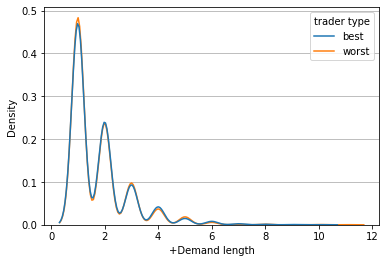

In [206]:
pos_neg_best_demands = [True if mean_best_demands[i] >= 0 else False for i in range(len(mean_best_demands))]
pos_neg_worst_demands = [True if mean_worst_demands[i] >= 0 else False for i in range(len(mean_worst_demands))]

# count length of positives
lengths_pos_best = []
lengths_pos_worst = []
cnt = 0
for i in range(len(pos_neg_best_demands)):
    if not pos_neg_best_demands[i]:
        cnt += 1
    else:
        lengths_pos_best.append(cnt)
        cnt = 0
        
for i in range(len(pos_neg_worst_demands)):
    if not pos_neg_worst_demands[i]:
        cnt += 1
    else:
        lengths_pos_worst.append(cnt)
        cnt = 0

# remove zeros
lengths_pos_best = [i for i in lengths_pos_best if i != 0] 
lengths_pos_worst = [i for i in lengths_pos_worst if i != 0] 

# add to new df
length_demand_df = pd.DataFrame({'+Demand length': lengths_pos_best + lengths_pos_worst,
                                 'trader type': ['best'] * len(lengths_pos_best) + 
                                 ['worst'] * len(lengths_pos_worst)
                                })

g = sns.kdeplot(data=length_demand_df, x='+Demand length', hue='trader type')
g.xaxis.grid(False)

In [626]:
n_samples = 1000
len_samples = 500
high = 19999 - len_samples
# Block bootstrap levene test
np.mean([sum([True if levene(mean_best_profits[(a := np.random.randint(low=0, high=high)): a + len_samples], 
                       mean_worst_profits[a: a + 1000])[1] < 0.05 else False 
              for _ in range(n_samples)]) 
         for i in range(10)])/n_samples



0.7672

In [36]:
# Look into demands
from itertools import chain
from joypy import joyplot
from pandas.api.types import CategoricalDtype
trenders = [1,3,5,10,15,25]
params = lema_params

datapoints = [[np.mean(params[i][0]['demands'][j]['trend']) 
               for j in range(len(params[i][0]['demands']))] 
              for i in range(len(params))]
datapoints = list(chain(*datapoints))


ga_datapoints = [[np.mean(params[i][0]['demands'][j]['ga']) 
               for j in range(len(params[i][0]['demands']))] 
              for i in range(len(params))]
ga_datapoints = list(chain(*ga_datapoints))

ga_profits = [[np.mean(params[i][0]['agent profits'][j]['ga']) 
               for j in range(len(params[i][0]['agent profits']))] 
              for i in range(len(params))]
ga_profits = list(chain(*ga_profits))

trend_profits = [[np.mean(params[i][0]['agent profits'][j]['trend']) 
               for j in range(len(params[i][0]['agent profits']))] 
              for i in range(len(params))]
trend_profits = list(chain(*trend_profits))

labels = [[f'{trenders[k]} Regression Traders'] * 20000 for k in range(6)]
labels = list(chain(*labels))

demand_data = pd.DataFrame(data={'Regression traders': datapoints,
                                 'Original': ga_datapoints,
                                 'Original Profits': ga_profits,
                                 'Trend Profits': trend_profits,
                                 'Number of regression traders': labels}) 

cat_noise = CategoricalDtype([f'{trenders[k]} Regression Traders' for k in range(6)])

demand_data['Number of regression traders'] = demand_data['Number of regression traders'].astype(cat_noise)

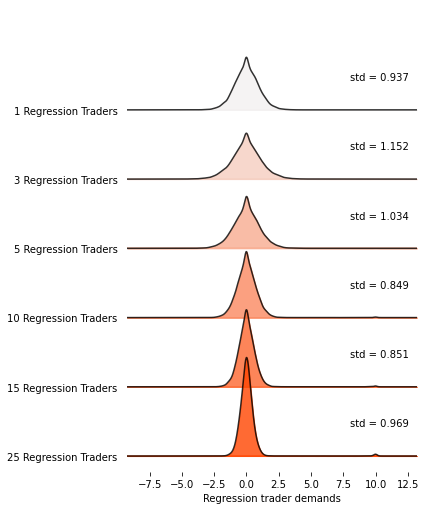

In [37]:
my_cmap = sns.light_palette("orangered", as_cmap=True)
fig, axes = joyplot(
    data=demand_data[['Regression traders', 'Number of regression traders']],
    alpha = 0.8,
    color = my_cmap(np.linspace(0,1,6)).tolist(),
    by='Number of regression traders',
    figsize=(6, 7)
    
)
demands_std = np.std(np.array(demand_data['Regression traders']).reshape(6, 20000), axis=1)
for i in range(len(demands_std)):
    y_position = axes[i].get_ylim()[1] / 3.5  # adjust with ylim for each plot
    axes[i].text(8, y_position, 'std = ' + str(round(demands_std[i],3)))
plt.xlabel('Regression trader demands')
plt.savefig('Pics/Ridgeline mean demands lema reg traders vs GA xi_09, mema.png', dpi=80, bbox_inches='tight')

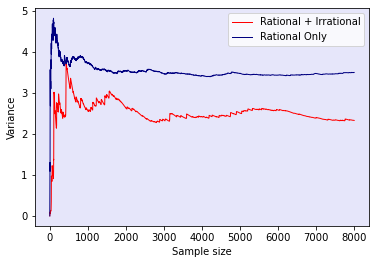

In [21]:
# Variances of prices through time
df = mema_dfs
fig, ax = plt.subplots()
prices = mema_dfs[4]['price'][0][-10000:]
ax.plot([np.var(np.diff(prices[:i])) for i in range(2, 8000)], c='red', label='Rational + Irrational', linewidth=1)

prices = init_market.priceTimeSeries[-10000:]
ax.plot([np.var(np.diff(prices[:i])) for i in range(2, 8000)], c='navy', label='Rational Only', linewidth=1)

ax.set_xlabel('Sample size')
ax.set_ylabel('Variance')
ax.grid(False)
ax.set_facecolor('lavender')

plt.legend()
plt.savefig('Pics/cover.png', dpi=200)

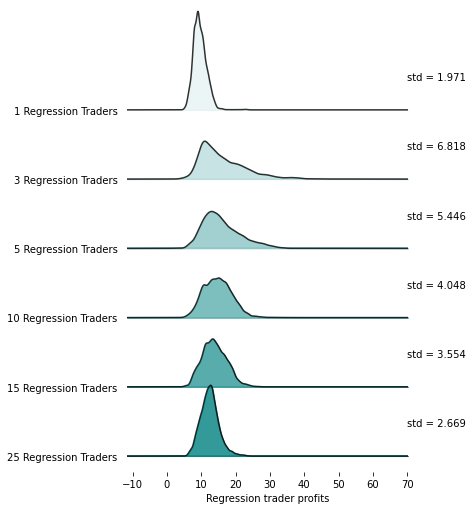

In [38]:
# Trend profits
# look into ga profits
my_cmap = sns.light_palette("teal", as_cmap=True)
fig, axes = joyplot(
    data=demand_data[['Trend Profits', 'Number of regression traders']],
    alpha = 0.8,
    color = my_cmap(np.linspace(0,1,6)).tolist(),
    by='Number of regression traders',
    figsize=(6, 7)
    
)
prfoits_std = np.std(np.array(demand_data['Trend Profits']).reshape(6, 20000), axis=1)
for i in range(len(prfoits_std)):
    y_position = axes[i].get_ylim()[1] / 3.5  # adjust with ylim for each plot
    axes[i].text(70, y_position, 'std = ' + str(round(prfoits_std[i],3)))
plt.xlabel('Regression trader profits')
plt.savefig('Pics/Ridgeline mean profits lema reg traders vs GA xi_09, mema.png', dpi=80, bbox_inches='tight')

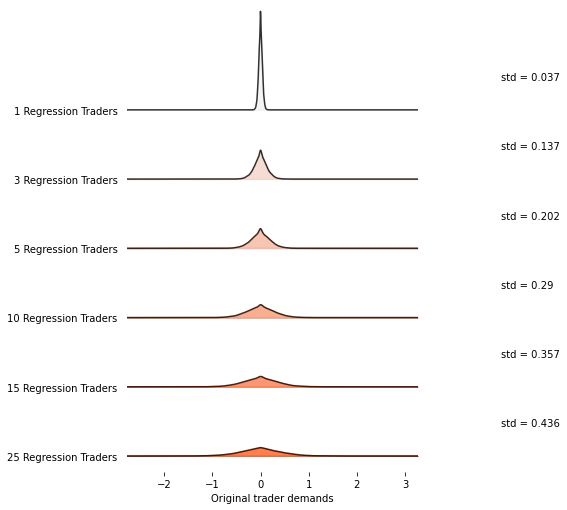

In [39]:
# Look into demands (GA)

my_cmap = sns.light_palette("orangered", as_cmap=True)
fig, axes = joyplot(
    data=demand_data[['Original', 'Number of regression traders']],
    alpha = 0.8,
    color = my_cmap(np.linspace(0,1,7)).tolist(),
    by='Number of regression traders',
    figsize=(6, 7))
    
demands_std = np.std(np.array(demand_data['Original']).reshape(6, 20000), axis=1)
for i in range(len(demands_std)):
    y_position = axes[i].get_ylim()[1] / 3.5  # adjust with ylim for each plot
    axes[i].text(5, y_position, 'std = ' + str(round(demands_std[i],3)))
plt.xlabel('Original trader demands')
plt.savefig('Pics/Ridgeline mean demands lema reg traders vs GA xi_09, GA.png', dpi=80, bbox_inches='tight')

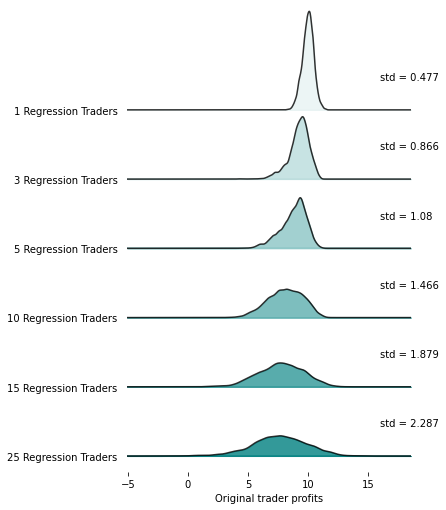

In [40]:
# look into GA profits
my_cmap = sns.light_palette("teal", as_cmap=True)

fig, axes = joyplot(
    data=demand_data[['Original Profits', 'Number of regression traders']],
    alpha = 0.8,
    color = my_cmap(np.linspace(0,1,6)).tolist(),
    by='Number of regression traders',
    figsize=(6, 7) 
)
prfoits_std = np.std(np.array(demand_data['Original Profits']).reshape(6, 20000), axis=1)
for i in range(len(prfoits_std)):
    y_position = axes[i].get_ylim()[1] / 3.5  # adjust with ylim for each plot
    axes[i].text(16, y_position, 'std = ' + str(round(prfoits_std[i],3)))
plt.xlabel('Original trader profits')

plt.savefig('Pics/Ridgeline mean profits lema reg traders vs GA xi_09, GA.png', dpi=80, bbox_inches='tight')

In [268]:
levene(demand_data['Original Profits'][30000:40000], demand_data['Original Profits'][50000:60000])

LeveneResult(statistic=102.71037165728667, pvalue=4.435230867719957e-24)

Text(0.5, 10.5, 'Regression trader demands')

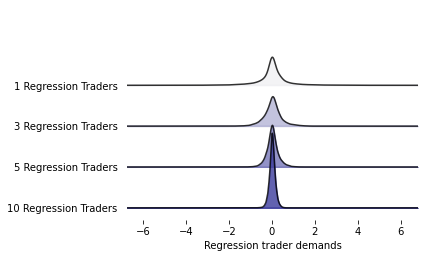

In [188]:
all_traders = np.divide(np.add(ga_datapoints, datapoints), 2)
labels = [[f'{len(trenders[k])} Regression Traders'] * 20000 for k in range(4)]
labels = list(chain(*labels))

demand_data_all = pd.DataFrame(data={'All': all_traders,
                                 'Original': ga_datapoints,
                                 'Number of regression traders': labels}) 

cat_noise = CategoricalDtype([f'{len(trenders[k])} Regression Traders' for k in range(4)])

demand_data_all['Number of regression traders'] = demand_data_all['Number of regression traders'].astype(cat_noise)

my_cmap = sns.light_palette("Navy", as_cmap=True)
joyplot(
    data=demand_data_all[['All', 'Number of regression traders']],
    alpha = 0.8,
    color = my_cmap(np.linspace(0,1,5)).tolist(),
    by='Number of regression traders',
    figsize=(6, 3.5)
    
)
plt.xlabel('Regression trader demands')
# plt.savefig('Pics/Ridgeline mean demands sema reg traders vs GA xi_09, sema.png', dpi=80, bbox_inches='tight')

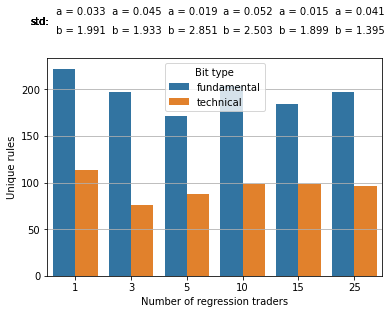

In [41]:
# look into the std of rule parameters

ga_agents = lema_ga
pdcoeff_std= []
offset_std = []

for i in range(6):
    unique_count = 0
    for agent in mema_ga[i][0]:
        rules = []
        for rule in agent.strategies:
            rules.append(rule.pdcoeff)
    pdcoeff_std.append(np.std(rules))

for i in range(6):
    unique_count = 0
    for agent in ga_agents[i][0]:
        rules = []
        for rule in agent.strategies:
            rules.append(rule.offset)
    offset_std.append(np.std(rules))

# look into rule specific variability
unique_counts_tech = []
unique_counts_fund = []

for i in range(6):
    unique_count = 0
    for agent in ga_agents[i][0]:
        rules = []
        for rule in agent.strategies:
            rules.append(tuple(rule.condition[:8]))
        unique_count += len(set(rules))
    unique_counts_fund.append(unique_count)

for i in range(6):
    unique_count = 0
    for agent in ga_agents[i][0]:
        rules = []
        for rule in agent.strategies:
            rules.append(tuple(rule.condition[8:]))
        unique_count += len(set(rules))
    unique_counts_tech.append(unique_count)
    
unique_count_df = pd.DataFrame({'Unique rules': unique_counts_fund + unique_counts_tech,
                               'Number of regression traders': ['1', '3', '5', '10', '15', '25'] * 2,
                               'Bit type': ['fundamental'] * 6 + ['technical'] * 6})

g = sns.barplot(x='Number of regression traders', y="Unique rules", hue="Bit type", data=unique_count_df)
g.patches[1].get_x()
for i in range(6):
    g.text(-0.8, 270, 'std:')
    g.text(g.patches[i].get_x(), 280, f' a = {pdcoeff_std[i]:.3f}')
    g.text(g.patches[i].get_x(), 260, f' b = {offset_std[i]:.3f}')
    
plt.savefig('Pics/Unique rules and a,b stds long ewma.png', dpi=80, bbox_inches='tight')

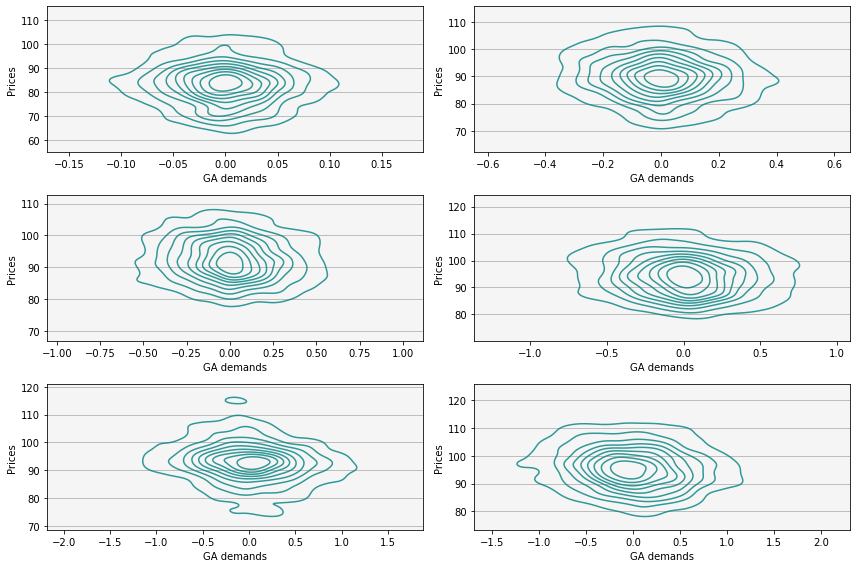

In [59]:
# Look at contours of demands
params = lema_params
dfs = lema_dfs 
my_range = range(10000, 12000)
fig = plt.figure(figsize=[12, 8])
for f in range(6):
    ax = fig.add_subplot(3, 2, f+1)
    trend_demands = [np.mean(params[f][0]['demands'][i]['trend']) for i in my_range]
    ga_demands = [np.mean(params[f][0]['demands'][i]['ga']) for i in my_range]
    prices = dfs[f]['price'][0][-10000:-8000]
    my_df = pd.DataFrame()
    my_df['GA demands'] = ga_demands
    my_df['Trend demands'] = trend_demands
    my_df['Prices'] = prices

    g = sns.kdeplot(ax=ax, data=my_df, x='GA demands', y='Prices', color='teal', alpha=0.8)
    ax.set_facecolor('whitesmoke')
    ax.xaxis.grid(False)
plt.tight_layout()

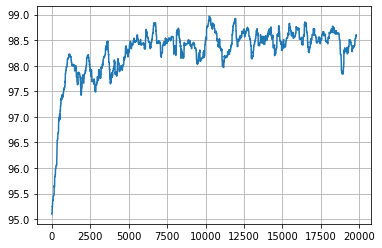

In [297]:
plt.plot([np.mean(lema_params[4][0]['agent strengths'][i]['ga'])
                  for i in range(len(lema_params[5][0]['agent strengths']))])

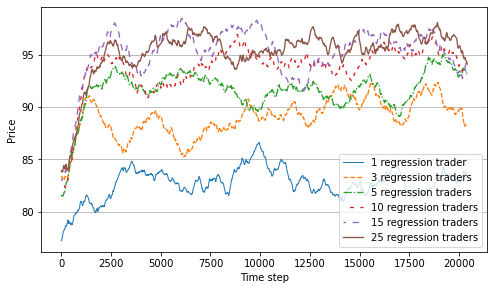

In [62]:
# Look into trend changes 
# This needs to be done more robustly, LATER]
dfs = lema_dfs
fig = plt.figure(figsize=[8,4.5])
plt.plot(uniform_filter1d(dfs[0]['price'][0][100:], 1500), linewidth=1, label='1 regression trader')
plt.plot(uniform_filter1d(dfs[1]['price'][0][100:], 1500), linewidth=1.3, linestyle='--', 
         label='3 regression traders')
plt.plot(uniform_filter1d(dfs[2]['price'][0][100:], 1500), linewidth=1.3, linestyle='-.', 
         label='5 regression traders')
plt.plot(uniform_filter1d(dfs[3]['price'][0][100:], 1500), linewidth=1.3, linestyle=(3,(3,5)), 
         label='10 regression traders')
plt.plot(uniform_filter1d(dfs[4]['price'][0][100:], 1500), linewidth=1.3, linestyle=(3,(5,5)), 
         label='15 regression traders')
plt.plot(uniform_filter1d(dfs[5]['price'][0][100:], 1500), linewidth=1.3, 
         label='25 regression traders')
plt.xlabel('Time step')
plt.ylabel('Price')
plt.gca().xaxis.grid(False)
# plt.gca().axvspan(2700, 5700, alpha=0.2, color='green')
# plt.gca().axvspan(6500, 11500, alpha=0.3, color='gold')
plt.legend()
plt.savefig('Pics/1 vs 10 long ewma regression traders smoothed price series.png', dpi=80)

In [191]:
np.std(np.divide(np.add(ga_datapoints, datapoints), 2).reshape(4, 20000), axis=1)

array([0.77350021, 0.42526411, 0.27928191, 0.14088417])

In [314]:
# Other risks

with open('Data\multiple_tau_df m 10 regression trenders ewma longer run', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    
risk_df = unserialized_data[0]
risk_agents_list = unserialized_data[1]
risk_trenders = unserialized_data[2]
risk_parameters = unserialized_data[3]

In [325]:
np.std([np.mean(mema_params[4][0]['demands'][k]['trend']) 
             for k in range(len(mema_params[4][0]['agent profits']))])

0.8977417430929696

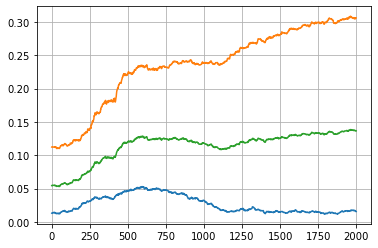

In [320]:
plt.plot([risk_parameters[0]['specific fracs'][i]['ga'][0] 
          for i in range(len(risk_parameters[0]['specific fracs']))], label='fundamental')

plt.plot([risk_parameters[0]['specific fracs'][i]['ga'][1] 
          for i in range(len(risk_parameters[0]['specific fracs']))], label='technical')

plt.plot([risk_parameters[0]['specific fracs'][i]['ga'][2] 
          for i in range(len(risk_parameters[0]['specific fracs']))], label='total')

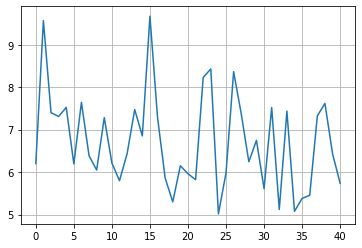

In [49]:
plt.plot([np.std(mema_dfs[4]['price'][0][i*500: (i+1) * 500]) for i in range(int(len(mema_dfs[4]['price'][0])/500))])

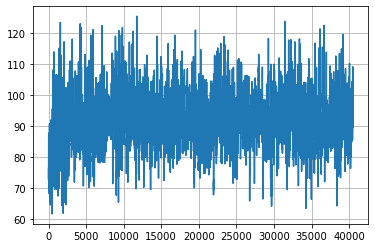

In [318]:
plt.plot(risk_df['price'][0])

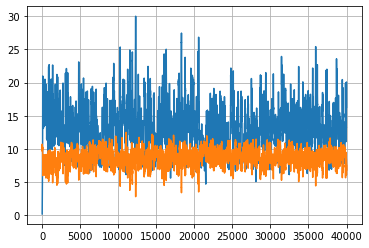

In [316]:
risk_trend = [np.mean(risk_parameters[0]['agent profits'][k]['trend']) 
             for k in range(len(risk_parameters[0]['agent profits']))]
risk_ga = [np.mean(risk_parameters[0]['agent profits'][k]['ga']) 
             for k in range(len(risk_parameters[0]['agent profits']))]

plt.plot(risk_trend)
plt.plot(risk_ga)

In [140]:
# Perform Bartlett's test to check equality of variances 
from scipy.stats import bartlett, levene

# bartlett(demand_data['Regression traders'][:20000], demand_data['Regression traders'][20000:40000], 
#         demand_data['Regression traders'][40000:60000], demand_data['Regression traders'][60000:80000])

levene(demand_data['Regression traders'][50000:50100], demand_data['Regression traders'][70000:70100], center='mean')

LeveneResult(statistic=23.320262350084686, pvalue=2.739345409158663e-06)

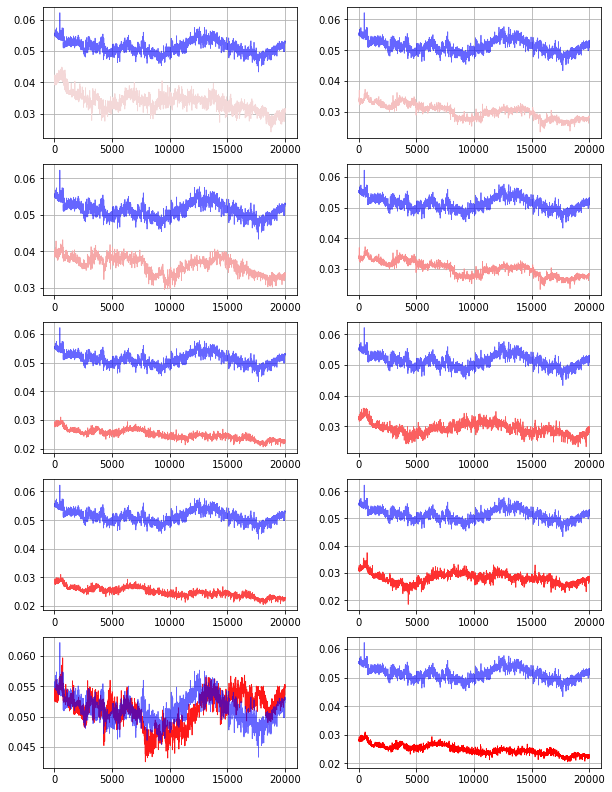

In [199]:
# plot each individual demand for those with more than 1 sample vs the 1 sample demand for regression traders
my_cmap = sns.light_palette("red", as_cmap=True)
colors = my_cmap(np.linspace(0.1, 1, 10)).tolist()
fig = plt.figure(figsize=[10, 14])
for i in range(10):
    ax = fig.add_subplot(5,2,i+1)
    ax.plot(uniform_filter1d([params[3][0]['demands'][per]['trend'][i] for per in range(20000)], 5000), 
             c=colors[i],
             linewidth=0.8)
    ax.plot(uniform_filter1d([params[0][0]['demands'][per]['trend'][0] for per in range(20000)], 5000), 
             c='blue', linewidth=0.8, alpha=0.6)
    

In [184]:
for i in range(10):
    print(np.std([params[3][0]['demands'][per]['trend'][i] for per in range(20000)]))

1.803927875862105
1.0933664771376188
1.4161919485694767
1.0933664771376188
0.9710253962460021
1.4925217673924573
0.9710253962460021
1.457551864577765
1.7838293221575685
0.9710253962460021


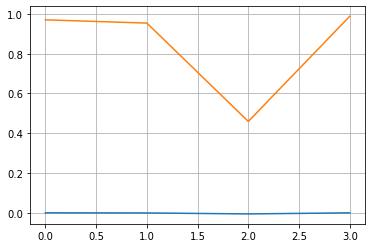

In [225]:
# Price demand correlations
pr = []
for i in range(4):
    pr.append(pearsonr(mema_dfs[i]['price'][0][-20000:], [np.mean(params[i][0]['demands'][k]['ga'])
                                                          for k in range(20000)]))
    
plt.plot(pr)

# They are not significant

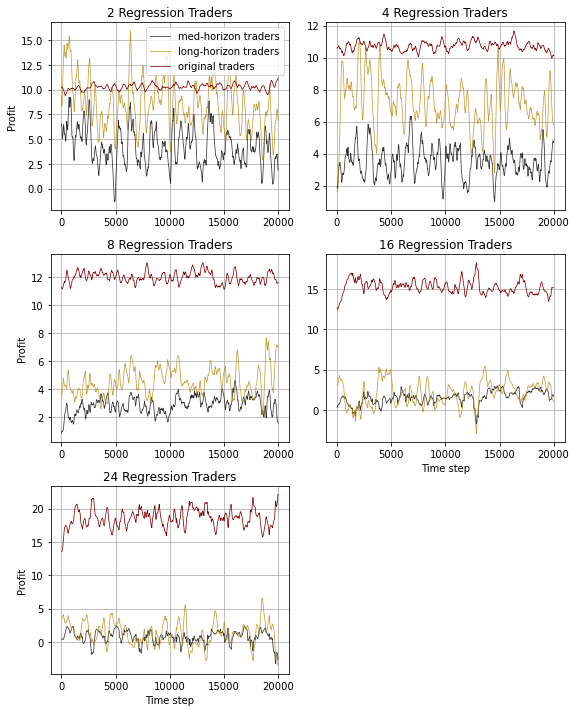

In [5]:
# Same as above for m + l regressors
params = ml_params
dfs = ml_dfs
trenders = ml_regtrender

fig = plt.figure(figsize = [8,10])

for i in range(len(params)):
    trend_profit_length = len(params[i][0]['agent profits'][0]['trend'])

    ax = fig.add_subplot(3,2,i+1)
    mean_trend_med_smoothed = uniform_filter1d([np.mean(params[i][0]['agent profits'][k]['trend']
                                               [:int(trend_profit_length/2)])
             for k in range(len(params[i][0]['agent profits']))], 300)
    mean_trend_long_smoothed = uniform_filter1d([np.mean(params[i][0]['agent profits'][k]['trend']
                                               [int(trend_profit_length/2):])
             for k in range(len(params[i][0]['agent profits']))], 300)
    mean_ga_smoothed = uniform_filter1d([np.mean(params[i][0]['agent profits'][k]['ga']) 
             for k in range(len(params[i][0]['agent profits']))], 300)
    
    ax.plot(mean_trend_med_smoothed, linewidth=0.75, alpha=0.8, 
            label='med-horizon traders', color='black')
    ax.plot(mean_trend_long_smoothed, linewidth=0.75, alpha=0.8, 
            label='long-horizon traders', color='darkgoldenrod')
    ax.plot(mean_ga_smoothed, linewidth=0.75, alpha=1, 
            label='original traders', color='maroon')

    ax.set_title(f'{len(trenders[i])} Regression Traders')
    if i == 0:
        ax.legend(loc='upper right')
    if i == 0 or i == 2 or i == 4:
        ax.set_ylabel('Profit')
    if i == 3 or i == 4:
        ax.set_xlabel('Time step')

plt.tight_layout()
plt.savefig('Pics\ regression follower profit med + long smoothed.svg', dpi=150, bbox_inches='tight')

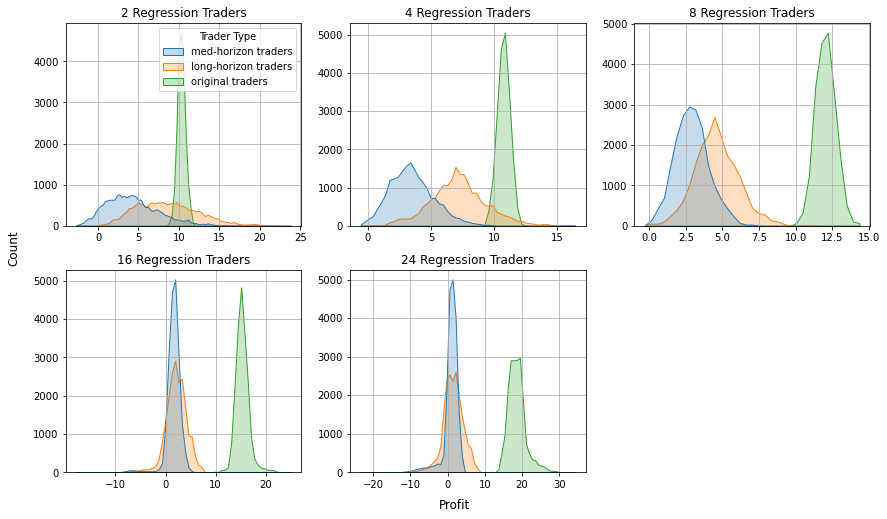

In [140]:
# Some stats related to above
%matplotlib inline

mean_profit_dfs = []
mean_trend_med = []
mean_trend_long = []
mean_ga = []
fig = plt.figure(figsize=[12,7])
for i in range(5):
    
    mean_trend_med.append([np.mean(params[i][0]['agent profits'][k]['trend']
                      [:int(len(params[i][0]['agent profits'][0]['trend'])/2)])
                 for k in range(len(params[i][0]['agent profits']))])

    mean_trend_long.append([np.mean(params[i][0]['agent profits'][k]['trend']
                       [int(len(params[i][0]['agent profits'][0]['trend'])/2):])
                               for k in range(len(params[i][0]['agent profits']))])

    mean_ga.append([np.mean(params[i][0]['agent profits'][k]['ga']) 
                 for k in range(len(params[i][0]['agent profits']))])

    data_dict = {'Profits': mean_trend_med[i] + mean_trend_long[i] + mean_ga[i],
                 'Trader Type': ['med-horizon traders'] * len(mean_trend_med[-1]) + 
                                ['long-horizon traders'] * len(mean_trend_med[-1]) +
                                ['original traders'] * len(mean_trend_med[-1])}
    
    mean_profit_dfs.append(pd.DataFrame(data_dict))                        
    ax = fig.add_subplot(2,3,i+1)
    if i == 0:
        sns.histplot(mean_profit_dfs[i], x='Profits', hue='Trader Type', element="poly", ax=ax)
    else:
        sns.histplot(mean_profit_dfs[i], x='Profits', hue='Trader Type', element="poly", ax=ax, legend=False)
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(f'{len(ml_regtrender[i])} Regression Traders')

fig.text(-.01, 0.5, 'Count', va='center', ha='center', rotation='vertical',fontsize = 12)
fig.text(0.5, -.01, 'Profit', va='center', ha='center',fontsize = 12)
plt.tight_layout()
plt.savefig('Pics/Distribution of profits reg trenders m + l.png', dpi=100, bbox_inches='tight')

In [91]:
# Correlation Heatmap between profits

reg_data_profit = {'Med-horizon': mean_trend_med[0][:] + mean_trend_med[1][:] + 
                   mean_trend_med[2][:] + mean_trend_med[3][:] + 
                   mean_trend_med[4][:],
                   
                   'Long-horizon': mean_trend_long[0][:] + mean_trend_long[1][:] + 
                   mean_trend_long[2][:] + mean_trend_long[3][:] +
                   mean_trend_long[4][:],
                   
                   'Original': mean_ga[0][:] + mean_ga[1][:] + 
                   mean_ga[2][:] + mean_ga[3][:] + 
                   mean_ga[4][:],
                   
                   'Trader Type': [f'{len(ml_regtrender[0])} regression traders'] * len(mean_trend_med[0]) +
                   [f'{len(ml_regtrender[1])} regression traders'] * len(mean_trend_med[1]) + 
                   [f'{len(ml_regtrender[2])} regression traders'] * len(mean_trend_med[2]) +
                   [f'{len(ml_regtrender[3])} regression traders'] * len(mean_trend_med[3]) +
                   [f'{len(ml_regtrender[4])} regression traders'] * len(mean_trend_med[4])}

reg_df_profit = pd.DataFrame(reg_data_profit)
reg_df_profit
# g = sns.jointplot("Med-horizon", "Original", data=reg_df_profit, kind='reg', marker='.',
#                joint_kws={'line_kws':{'color':'red'}})
# r, p = spearmanr(reg_df_profit['Long-horizon'], reg_df_profit['Original'])

# g.ax_joint.annotate(f'spearman $\\rho = {r:.3f}, p = {p:.3f}$',
#                     xy=(0.4, 0.9), xycoords='axes fraction',
#                     ha='left', va='center',
#                     bbox={'boxstyle': 'round', 'fc': 'whitesmoke', 'ec': 'navy'})

Med-horizon  Long-horizon   Original            Trader Type
0         0.161526      0.161526   9.768516   2 regression traders
1         0.118346      0.321959   9.781037   2 regression traders
2         0.020509      0.381397   9.830598   2 regression traders
3        -0.100082      0.313449   9.861309   2 regression traders
4        -0.152996      0.317159   9.817451   2 regression traders
...            ...           ...        ...                    ...
99995    -1.106713     -1.374781  21.940466  24 regression traders
99996    -1.109761     -1.366679  21.784483  24 regression traders
99997    -1.111196     -1.352591  21.893934  24 regression traders
99998    -1.129418     -1.359480  22.042670  24 regression traders
99999    -1.143731     -1.362851  22.000961  24 regression traders

[100000 rows x 4 columns]

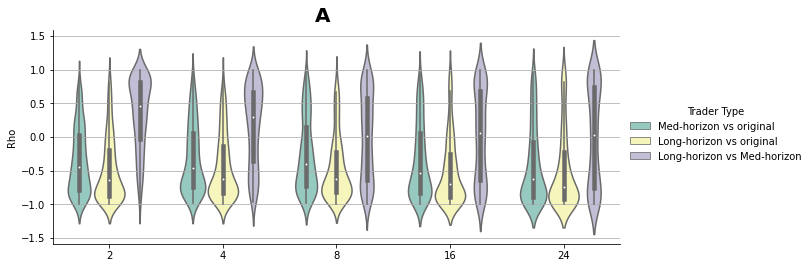

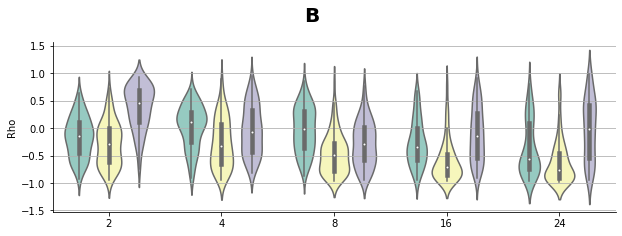

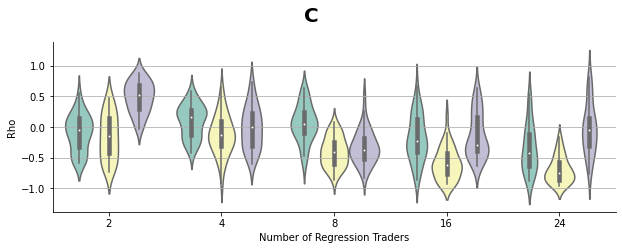

In [138]:
# A distribution of short-term correlations
Letters = ['A', 'B', 'C']

for i, inter in enumerate([50, 200, 500]):

    interval=inter
    spearman_results = [spearmanr(mean_trend_med[0][i*interval: (i+1)*interval], 
                                       mean_ga[0][i*interval: (i+1)*interval])[0]
                            for i in range(int(len(mean_ga[0]) / interval))]
    fixed_len = len(spearman_results)
    market_type = [f'{len(ml_regtrender[0])}'] * fixed_len

    for k in range(1, len(mean_trend_med)):
        spearman_results += [spearmanr(mean_trend_med[k][i*interval: (i+1)*interval], 
                                       mean_ga[k][i*interval: (i+1)*interval])[0]
                            for i in range(int(len(mean_ga[k]) / interval))]

        market_type += [f'{len(ml_regtrender[k])}'] * fixed_len

    trader_type = ['Med-horizon vs original'] * len(spearman_results)

    for k in range(len(mean_trend_long)):
        spearman_results += [spearmanr(mean_trend_long[k][i*interval: (i+1)*interval], 
                                       mean_ga[k][i*interval: (i+1)*interval])[0]
                            for i in range(int(len(mean_ga[k]) / interval))]

        market_type += [f'{len(ml_regtrender[k])}'] * fixed_len

    trader_type += ['Long-horizon vs original'] * int(len(spearman_results)/2)
    
    for k in range(len(mean_trend_long)):
        spearman_results += [spearmanr(mean_trend_long[k][i*interval: (i+1)*interval], 
                                       mean_trend_med[k][i*interval: (i+1)*interval])[0]
                            for i in range(int(len(mean_trend_long[k]) / interval))]

        market_type += [f'{len(ml_regtrender[k])}'] * fixed_len

    trader_type += ['Long-horizon vs Med-horizon'] * int(len(spearman_results)/3)

    data_spearman = {'Rho': spearman_results,
                     'Number of Regression Traders': market_type,
                     'Trader Type': trader_type}

    spearman_df = pd.DataFrame(data_spearman)
    
    if i == 0:
        g = sns.catplot(y='Rho', x='Number of Regression Traders', data=spearman_df, kind="violin", 
                        palette='Set3', hue='Trader Type', height=3.5, aspect=2.5)
        g.fig.suptitle(Letters[i], fontsize=20, fontweight='bold', x=0.4, y=1.05)
    else:
        g = sns.catplot(y='Rho', x='Number of Regression Traders', data=spearman_df, kind="violin", 
                        palette='Set3', hue='Trader Type', height=3.5, aspect=2.5, legend=False)
        g.fig.suptitle(Letters[i], fontsize=20, fontweight='bold')
        
    if i != 0:
        plt.tight_layout()
    plt.xlabel(None)

plt.xlabel('Number of Regression Traders')
plt.savefig('Pics\Correlation of Reg traders with original ones violin.png', dpi=100, bbox_inches='tight')

In [97]:
# distribution of differences of means
dist_params = l_params

for i in range(5):
    mean_diff_profit = np.subtract([np.mean(dist_params[i][0]['agent profits'][k]['trend']) 
                                    for k in range(len(dist_params[i][0]['agent profits']))],
                                   [np.mean(dist_params[i][0]['agent profits'][k]['ga']) 
                                    for k in range(len(dist_params[i][0]['agent profits']))])
    mean_diffprofit_df = pd.DataFrame(mean_diff_profit, columns=['profit difference'])
mean_diffprofit_df
#     sns.histplot(mean_diffprofit_df, kde=True)
#     plt.show()

profit difference
0              -9.606990
1              -9.416759
2              -9.230295
3              -9.110811
4              -9.151300
...                  ...
19995         -13.433749
19996         -13.387645
19997         -13.348253
19998         -13.325570
19999         -13.333817

[20000 rows x 1 columns]

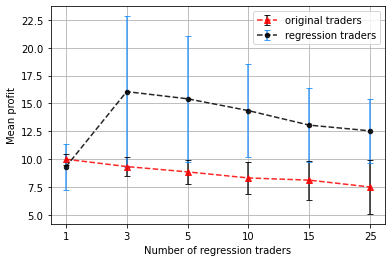

In [197]:
# difference of profits as a function of number of traders
params = lema_params
mean_profits_tech = []
mean_profits_ga = []
error_ga = []
error_trend = []

for par in range(len(params)):
    mean_profits_ga.append(np.mean([np.mean(params[par][0]['agent profits'][i]['ga']) 
                                            for i in range(10000,len(params[0][0]['agent profits']))]))
    mean_profits_tech.append(np.mean([np.mean(params[par][0]['agent profits'][i]['trend'])
                                        for i in range(10000, len(params[par][0]['agent profits']))]))
    error_ga.append(np.std([np.mean(params[par][0]['agent profits'][i]['ga']) 
                                            for i in range(10000,len(params[0][0]['agent profits']))]))
    error_trend.append(np.std([np.mean(params[par][0]['agent profits'][i]['trend'])
                                        for i in range(10000,len(params[par][0]['agent profits']))]))

plt.errorbar(np.arange(6), mean_profits_ga, error_ga, marker='^', c='r', 
             markersize=6, label='original traders', alpha=0.85, linestyle='--', 
             ecolor='black', capsize=3)
plt.errorbar(np.arange(6), mean_profits_tech, error_trend, marker='o',c='black', 
             markersize=4.5, label='regression traders', alpha=0.85, linestyle='--', 
             ecolor='dodgerblue', capsize=3)
plt.xticks(ticks=[0,1,2,3,4,5], labels=[1, 3, 5, 10, 15, 25])
plt.xlabel('Number of regression traders')
plt.ylabel('Mean profit')
plt.legend()
plt.savefig('Pics\Mean profits of original vs lema regression traders.png', dpi=60)

In [200]:
ttest_ind([np.mean(params[0][0]['agent profits'][i]['ga']) 
                                            for i in range(10000,len(params[0][0]['agent profits']))], 
          [np.mean(params[0][0]['agent profits'][i]['trend'])
                                        for i in range(10000, len(params[par][0]['agent profits']))], equal_var=False)

Ttest_indResult(statistic=32.773335525094566, pvalue=6.285215574158914e-225)

In [555]:
# t-test to see if the mean of the two profits are significantly different
params = mema_params
mean_1 = [np.mean(params[5][0]['agent profits'][i]['ga'])
                                        for i in range(20000)]

mean_2 = [np.mean(params[5][0]['agent profits'][i]['trend'])
                                      for i in range(20000)]

n_samples = 5000
# Block bootstrap
np.mean([sum([True if ttest_ind(mean_1[(a := np.random.randint(low=0, high=19899)): a + 100], 
                       mean_2[(b := np.random.randint(low=0, high=19899)): b + 100], 
                   equal_var=False)[1] < 0.05 else False for _ in range(n_samples)]) for i in range(10)])/n_samples



0.88966

In [405]:
sema_dfs[0]['price'][0][0:20]

[76.34976644768304,
 75.19627498980536,
 74.54829803448918,
 72.67902953346865,
 73.66405782627582,
 74.047673044037,
 76.34413343476714,
 75.00697578554593,
 74.23044160763145,
 75.00673342517976,
 75.61101233680309,
 75.72373186791438,
 78.3047231601782,
 82.17653056693078,
 81.63079944367414,
 81.702932209121,
 79.16042677066736,
 79.28284627125498,
 80.80554525658223,
 82.83321577981611]

In [495]:
# check the slopes of 3 short regression traders plots
def ewma(series, history, n):
    alpha = 2 / (n + 1)
    ma = [(series[-history] + sum([series[-history - t] * (1 - alpha) ** t for t in range(1, n)])) /
          sum([(1 - alpha) ** i for i in range(n)])]
    for i in reversed(range(1, history)):
        ma.append(alpha * series[-i] + (1 - alpha) * ma[-1])
    return ma

def ema_regress(tau, a):
    exp_ma = ewma(lema_dfs[2]['price'][0][a: a + 500],
                  tau+1, 9)
    reg = linear_model.LinearRegression(fit_intercept=False).fit(np.array(exp_ma[tau - 1: -1]).reshape(-1, 1),
                                              exp_ma[tau:])
    pdcoeff = reg.coef_[0]
    offset = reg.intercept_
    return pdcoeff

all_pd = []
for i in range(1000):
    pdcoeffs = []
    a = np.random.randint(0, 19500)
    for j in np.random.choice(np.arange(20, 50), 5, replace=False):
        pdcoeffs.append(ema_regress(j, a))
    all_pd.append(pdcoeffs)

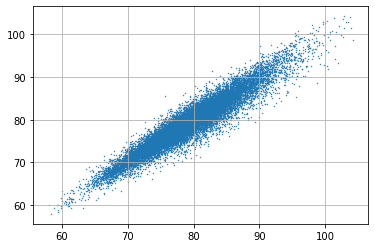

In [479]:
plt.scatter(sema_dfs[2]['price'][0][100:18000], sema_dfs[2]['price'][0][101:18001], s=0.2)

In [496]:
m = np.mean(np.max(all_pd, axis=1) - np.min(all_pd, axis=1))
s = np.std(np.max(all_pd, axis=1) - np.min(all_pd, axis=1))
print(m,s)

8.9245094408682e-06 9.812715495160197e-06


In [ ]:
# difference of profits as a function of number of traders
# When there are more than one reg trenders

mean_profits_tech = []
mean_profits_ga = []
error_ga = []
error_trend = []

for par in range(len(params)):
    mean_profits_ga.append(np.mean([np.mean(params[par][0]['agent profits'][i]['ga']) 
                                            for i in range(len(params[0][0]['agent profits']))]))
    mean_profits_tech.append(np.mean([np.mean(params[par][0]['agent profits'][i]['trend'])
                                        for i in range(len(params[par][0]['agent profits']))]))
    error_ga.append(np.std([np.mean(params[par][0]['agent profits'][i]['ga']) 
                                            for i in range(len(params[0][0]['agent profits']))]))
    error_trend.append(np.std([np.mean(params[par][0]['agent profits'][i]['trend'])
                                        for i in range(len(params[par][0]['agent profits']))]))

plt.errorbar(np.arange(5), mean_profits_ga, error_ga, marker='^', c='r', 
             markersize=6, label='original traders', alpha=0.85, linestyle='--', 
             ecolor='black', capsize=3)
plt.errorbar(np.arange(5), mean_profits_tech, error_trend, marker='o',c='black', 
             markersize=4.5, label='regression traders', alpha=0.85, linestyle='--', 
             ecolor='dodgerblue', capsize=3)
plt.xticks(ticks=[0,1,2,3,4], labels=[1, 5, 10, 15, 25])
plt.xlabel('Number of regression traders')
plt.ylabel('Mean profit')
plt.legend()
plt.savefig('Pics\Mean profits of original vs long regression traders.svg', dpi=60)

In [147]:
# Combine the two above figures and export as pdf
import svgutils.transform as sg
import subprocess
import os

fig = sg.SVGFigure("13cm", "6.5cm")

# load matpotlib-generated figures
fig1 = sg.fromfile('Pics\ regression follower profit med.svg')
fig2 = sg.fromfile('Pics\Mean profits of original vs med regression traders.svg')

# get the plot objects
plot1 = fig1.getroot()
plot2 = fig2.getroot()
plot2.moveto(, 460)

# add text labels
txt1 = sg.TextElement(25,20, "A", size=22, weight="bold")
txt2 = sg.TextElement(490, "B", size=22, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2])
fig.append([txt1, txt2])

# save generated SVG files
fig.save("Pics\\fig_final.svg")
subprocess.call(['inkscape','Pics/fig_final.svg',
                 '--export-area-drawing',  '--batch-process',
                 '--export-type=pdf', '--export-filename=Pics/med reg trender stat profits.pdf'])
os.remove("Pics\\fig_final.svg")

In [6]:
# Plot progression of different values
from scipy.stats import kurtosis

standard_dev = []
kurtosis_ = []
gamma_ = []
excess_ret_ = []
arch_ = []
trading_volume_ = []
query_df = mema_dfs
for i in range(len(query_df)):
    divseries = query_df[i]['dividend'][0][-20000:-10000]
    priceseries = query_df[i]['price'][0][-20000:-10000]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-20000:-10000]

    y_train = pricecumdiv[2:]
    X_train = np.c_[pricecumdiv[1:-1], priceseries[:-2]]
    residuals = datahandler.find_residuals(y_train, X_train)
    standard_dev.append(np.std(residuals))
    kurtosis_.append(kurtosis(residuals))
    gamma_.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_.append(datahandler.arch(residuals)[2])
    trading_volume_.append(np.mean(query_df[i]['volume'][0][-20000:-10000]))
    excess_ret_.append(datahandler.excess_return(priceseries, divseries, 0.1))
    
standard_dev1 = []
kurtosis_1 = []
gamma_1 = []
excess_ret_1 = []
arch_1 = []
trading_volume_1 = []
for i in range(len(query_df)):
    divseries = query_df[i]['dividend'][0][-10000:]
    priceseries = query_df[i]['price'][0][-10000:]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-10000:]

    y_train = pricecumdiv[2:]
    X_train = np.c_[pricecumdiv[1:-1], priceseries[:-2]]
    residuals = datahandler.find_residuals(y_train, X_train)
    standard_dev1.append(np.std(residuals))
    kurtosis_1.append(kurtosis(residuals))
    gamma_1.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_1.append(datahandler.arch(residuals)[2])
    trading_volume_1.append(np.mean(query_df[i]['volume'][0][-10000:]))
    excess_ret_1.append(datahandler.excess_return(priceseries, divseries, 0.1))
    
# standard_dev2 = []
# for i in range(len(ml_dfs)):
#     divseries = ml_dfs[i]['dividend'][0][-20000:-10000]
#     priceseries = ml_dfs[i]['price'][0][-20000:-10000]
#     pricecumdiv = ml_dfs[i]['pricecumdiv'][0][-20000:-10000]

#     y_train = pricecumdiv[1:]
#     X_train = np.array(pricecumdiv[:-1]).reshape(-1, 1)
#     standard_dev2.append(np.std(datahandler.find_residuals(y_train, X_train)))

# standard_dev3 = []
# for i in range(len(ml_dfs)):
#     divseries = ml_dfs[i]['dividend'][0][-10000:]
#     priceseries = ml_dfs[i]['price'][0][-10000:]
#     pricecumdiv = ml_dfs[i]['pricecumdiv'][0][-10000:]

#     y_train = pricecumdiv[1:]
#     X_train = np.array(pricecumdiv[:-1]).reshape(-1, 1)
#     standard_dev3.append(np.std(datahandler.find_residuals(y_train, X_train)))
    
# plt.plot(standard_dev, label='first half', c='slateblue')
# plt.plot(standard_dev1, '-x', label='second half', c='crimson')
# labels = [str(len(unserialized_data[2][i])) for i in range(len(unserialized_data[2]))]
# plt.xticks(np.arange(len(unserialized_data[2])), labels)
# plt.xlabel('number of regression traders')
# plt.ylabel('residuals standard deviation')
# plt.legend()

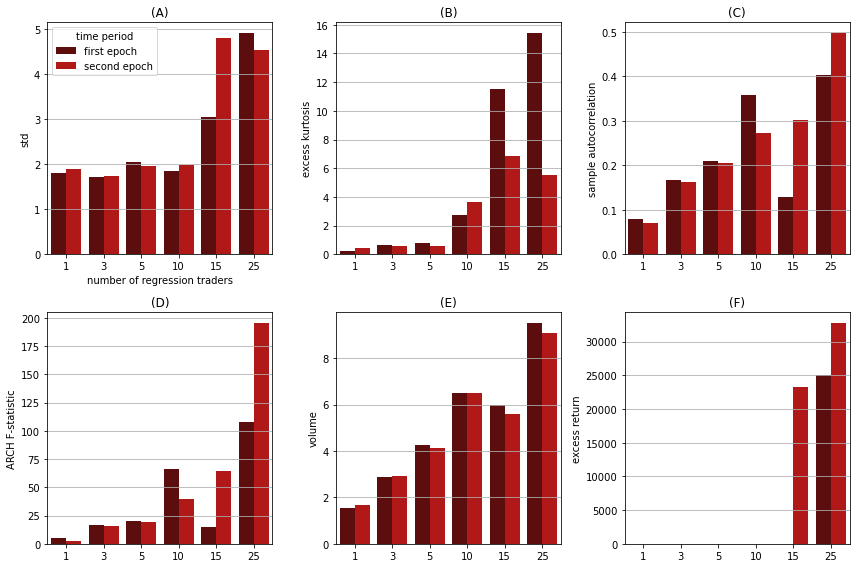

In [81]:
%matplotlib inline

num_regtraders = [len(unserialized_data[2][i]) for i in range(len(unserialized_data[2]))] * 2
df = pd.DataFrame(zip(num_regtraders,
                      standard_dev + standard_dev1,
                      kurtosis_ + kurtosis_1,
                      gamma_ + gamma_1,
                      arch_ + arch_1,
                      trading_volume_ + trading_volume_1,
                      excess_ret_ + excess_ret_1,
                      ['first epoch'] * len(query_df) + ['second epoch'] * len(query_df)), 
                  columns=['number of regression traders', 'std', 'excess kurtosis', 
                           'sample autocorrelation', 'ARCH F-statistic', 'volume', 
                           'excess return', 'time period'])


fig, axes = plt.subplots(2, 3, figsize=(12, 8))
palette_ = sns.color_palette("hot")
sns.barplot(ax = axes[0, 0], x='number of regression traders', hue="time period", y="std", data=df, 
            palette=palette_)
axes[0, 0].set_title('(A)')

g = sns.barplot(ax = axes[0, 1], x='number of regression traders', hue="time period", y="excess kurtosis", data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[0, 1].set_title('(B)')

g = sns.barplot(ax = axes[0, 2], x='number of regression traders', hue="time period", y="sample autocorrelation", data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[0, 2].set_title('(C)')

g = sns.barplot(ax = axes[1, 0], x='number of regression traders', hue="time period", y='ARCH F-statistic', data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[1, 0].set_title('(D)')

g=sns.barplot(ax = axes[1, 1], x='number of regression traders', hue="time period", y='volume', data=df,
            palette=palette_)
g.set_xlabel(None)
g.legend_.remove()

axes[1, 1].set_title('(E)')
g =sns.barplot(ax = axes[1, 2], x='number of regression traders', hue="time period", y='excess return', data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[1, 2].set_title('(F)')

plt.tight_layout()
# plt.savefig('Pics\ residual statistics regression traders auto M+L.png', dpi=200)


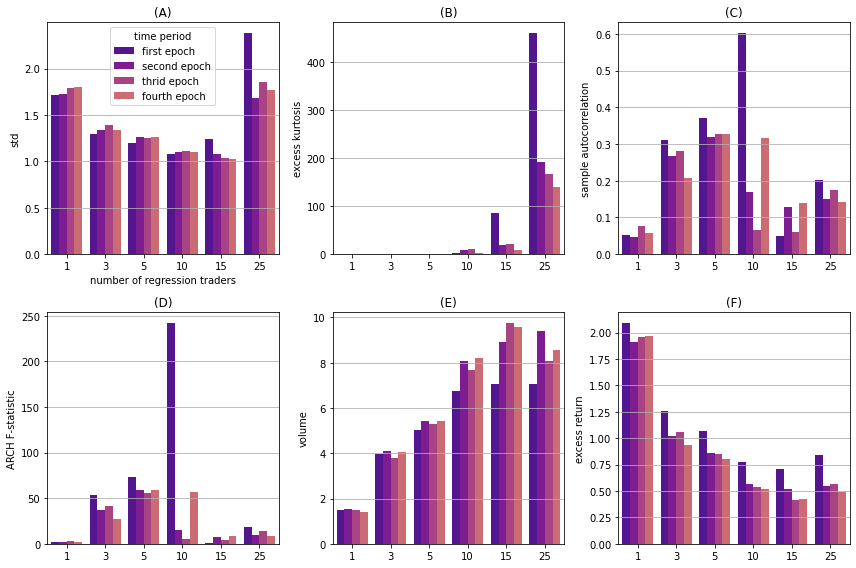

In [30]:
# Plot progression of different values 4 epochs
from scipy.stats import kurtosis

query_df = lema_dfs

standard_dev = []
kurtosis_ = []
gamma_ = []
excess_ret_ = []
arch_ = []
trading_volume_ = []

standard_dev1 = []
kurtosis_1 = []
gamma_1 = []
excess_ret_1 = []
arch_1 = []
trading_volume_1 = []

standard_dev2 = []
kurtosis_2 = []
gamma_2 = []
excess_ret_2 = []
arch_2 = []
trading_volume_2 = []

standard_dev3 = []
kurtosis_3 = []
gamma_3 = []
excess_ret_3 = []
arch_3 = []
trading_volume_3 = []

for i in range(len(query_df)):
    divseries = query_df[i]['dividend'][0][-20000:-15000]
    priceseries = query_df[i]['price'][0][-20000:-15000]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-20000:-15000]

    y_train = pricecumdiv[1:]
#     X_train = np.c_[pricecumdiv[1:-1], priceseries[:-2]]
    X_train = np.array(pricecumdiv[:-1]).reshape(-1, 1)
    residuals = datahandler.find_residuals(y_train, X_train)
    standard_dev.append(np.std(residuals))
    kurtosis_.append(kurtosis(residuals))
    gamma_.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_.append(datahandler.arch(residuals)[2])
    trading_volume_.append(np.mean(query_df[i]['volume'][0][-20000:-15000]))
    excess_ret_.append(datahandler.excess_return(priceseries, divseries, 0.1))
    
    
    divseries = query_df[i]['dividend'][0][-15000:-10000]
    priceseries = query_df[i]['price'][0][-15000:-10000]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-15000:-10000]

    y_train = pricecumdiv[1:]
#     X_train = np.c_[pricecumdiv[1:-1], priceseries[:-2]]
    X_train = np.array(pricecumdiv[:-1]).reshape(-1, 1)
    residuals = datahandler.find_residuals(y_train, X_train)
    standard_dev1.append(np.std(residuals))
    kurtosis_1.append(kurtosis(residuals))
    gamma_1.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_1.append(datahandler.arch(residuals)[2])
    trading_volume_1.append(np.mean(query_df[i]['volume'][0][-15000:-10000]))
    excess_ret_1.append(datahandler.excess_return(priceseries, divseries, 0.1))
                                          
    divseries = query_df[i]['dividend'][0][-10000:-5000]
    priceseries = query_df[i]['price'][0][-10000:-5000]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-10000:-5000]

    y_train = pricecumdiv[1:]
#     X_train = np.c_[pricecumdiv[1:-1], priceseries[:-2]]
    X_train = np.array(pricecumdiv[:-1]).reshape(-1, 1)
    residuals = datahandler.find_residuals(y_train, X_train)
    standard_dev2.append(np.std(residuals))
    kurtosis_2.append(kurtosis(residuals))
    gamma_2.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_2.append(datahandler.arch(residuals)[2])
    trading_volume_2.append(np.mean(query_df[i]['volume'][0][-10000:-5000]))
    excess_ret_2.append(datahandler.excess_return(priceseries, divseries, 0.1))
                                          
    divseries = query_df[i]['dividend'][0][-5000:]
    priceseries = query_df[i]['price'][0][-5000:]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-5000:]
                                          
    y_train = pricecumdiv[1:]
#     X_train = np.c_[pricecumdiv[1:-1], priceseries[:-2]]
    X_train = np.array(pricecumdiv[:-1]).reshape(-1, 1)
    residuals = datahandler.find_residuals(y_train, X_train)
    standard_dev3.append(np.std(residuals))
    kurtosis_3.append(kurtosis(residuals))
    gamma_3.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_3.append(datahandler.arch(residuals)[2])
    trading_volume_3.append(np.mean(query_df[i]['volume'][0][-5000:]))
    excess_ret_3.append(datahandler.excess_return(priceseries, divseries, 0.1))
    
num_regtraders = [len(unserialized_data[2][i]) for i in range(len(unserialized_data[2]))] * 4
df = pd.DataFrame(zip(num_regtraders,
                      standard_dev + standard_dev1 + standard_dev2 + standard_dev3,
                      kurtosis_ + kurtosis_1 + kurtosis_2 + kurtosis_3,
                      gamma_ + gamma_1 + gamma_2 + gamma_3,
                      arch_ + arch_1 + arch_2 + arch_3,
                      trading_volume_ + trading_volume_1 + trading_volume_2 + trading_volume_3,
                      excess_ret_ + excess_ret_1 + excess_ret_2 + excess_ret_3,
                      ['first epoch'] * len(query_df) + ['second epoch'] * len(query_df) +
                      ['thrid epoch'] * len(query_df) + ['fourth epoch'] * len(query_df)), 
                  columns=['number of regression traders', 'std', 'excess kurtosis', 
                           'sample autocorrelation', 'ARCH F-statistic', 'volume', 
                           'excess return', 'time period'])


fig, axes = plt.subplots(2, 3, figsize=(12, 8))
palette_ = sns.color_palette("plasma")
sns.barplot(ax = axes[0, 0], x='number of regression traders', hue="time period", y="std", data=df, 
            palette=palette_)
axes[0, 0].set_title('(A)')

g = sns.barplot(ax = axes[0, 1], x='number of regression traders', hue="time period", y="excess kurtosis", data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[0, 1].set_title('(B)')

g = sns.barplot(ax = axes[0, 2], x='number of regression traders', hue="time period", y="sample autocorrelation", data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[0, 2].set_title('(C)')

g = sns.barplot(ax = axes[1, 0], x='number of regression traders', hue="time period", y='ARCH F-statistic', data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[1, 0].set_title('(D)')

g=sns.barplot(ax = axes[1, 1], x='number of regression traders', hue="time period", y='volume', data=df,
            palette=palette_)
g.set_xlabel(None)
g.legend_.remove()

axes[1, 1].set_title('(E)')
g =sns.barplot(ax = axes[1, 2], x='number of regression traders', hue="time period", y='excess return', data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[1, 2].set_title('(F)')

plt.tight_layout()
plt.savefig('Pics\ residual statistics regression traders auto long ewma.png', dpi=200)

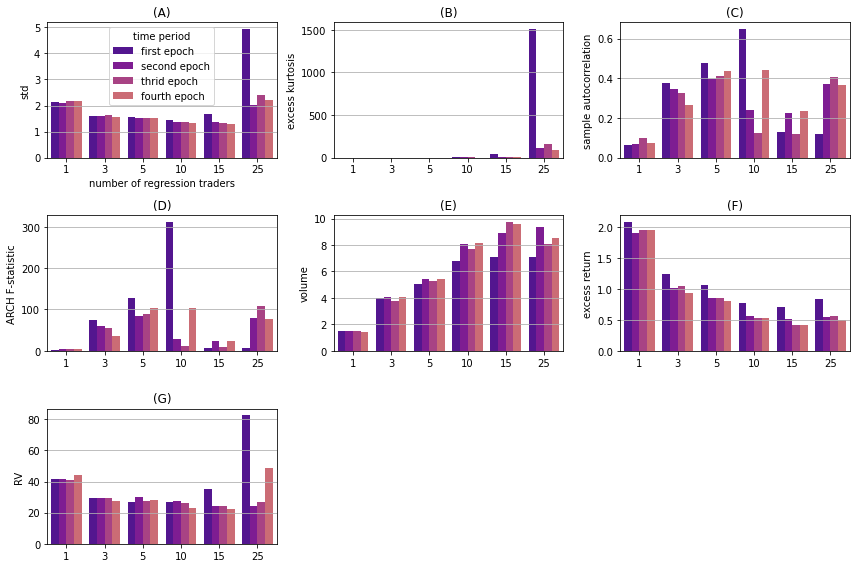

In [48]:
# returns using simple returns
%matplotlib inline


# Plot progression of different values 4 epochs
from scipy.stats import kurtosis

query_df = lema_dfs

standard_dev = []
kurtosis_ = []
gamma_ = []
excess_ret_ = []
arch_ = []
trading_volume_ = []
rv = []

standard_dev1 = []
kurtosis_1 = []
gamma_1 = []
excess_ret_1 = []
arch_1 = []
trading_volume_1 = []
rv_1 = []

standard_dev2 = []
kurtosis_2 = []
gamma_2 = []
excess_ret_2 = []
arch_2 = []
trading_volume_2 = []
rv_2 = []

standard_dev3 = []
kurtosis_3 = []
gamma_3 = []
excess_ret_3 = []
arch_3 = []
trading_volume_3 = []
rv_3 = []

for i in range(len(query_df)):
    divseries = query_df[i]['dividend'][0][-20000:-15000]
    priceseries = query_df[i]['price'][0][-20000:-15000]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-20000:-15000]

    residuals = [((pricecumdiv[i+1]/priceseries[i]) - 1) * 100 for i in range(len(pricecumdiv)-1)]
    residuals -= np.mean(residuals)
    standard_dev.append(np.std(residuals))
    kurtosis_.append(kurtosis(residuals))
    gamma_.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_.append(datahandler.arch(residuals)[2])
    trading_volume_.append(np.mean(query_df[i]['volume'][0][-20000:-15000]))
    excess_ret_.append(datahandler.excess_return(priceseries, divseries, 0.1))
    rv.append(realized_volatility(residuals[::15]))
    
    divseries = query_df[i]['dividend'][0][-15000:-10000]
    priceseries = query_df[i]['price'][0][-15000:-10000]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-15000:-10000]

    residuals = [((pricecumdiv[i+1]/priceseries[i]) - 1) * 100 for i in range(len(pricecumdiv)-1)]
    residuals -= np.mean(residuals)
    standard_dev1.append(np.std(residuals))
    kurtosis_1.append(kurtosis(residuals))
    gamma_1.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_1.append(datahandler.arch(residuals)[2])
    trading_volume_1.append(np.mean(query_df[i]['volume'][0][-15000:-10000]))
    excess_ret_1.append(datahandler.excess_return(priceseries, divseries, 0.1))
    rv_1.append(realized_volatility(residuals[::15]))  
    
    divseries = query_df[i]['dividend'][0][-10000:-5000]
    priceseries = query_df[i]['price'][0][-10000:-5000]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-10000:-5000]

    residuals = [((pricecumdiv[i+1]/priceseries[i]) - 1) * 100 for i in range(len(pricecumdiv)-1)]
    residuals -= np.mean(residuals)
    standard_dev2.append(np.std(residuals))
    kurtosis_2.append(kurtosis(residuals))
    gamma_2.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_2.append(datahandler.arch(residuals)[2])
    trading_volume_2.append(np.mean(query_df[i]['volume'][0][-10000:-5000]))
    excess_ret_2.append(datahandler.excess_return(priceseries, divseries, 0.1))
    rv_2.append(realized_volatility(residuals[::15]))  
    
    divseries = query_df[i]['dividend'][0][-5000:]
    priceseries = query_df[i]['price'][0][-5000:]
    pricecumdiv = query_df[i]['pricecumdiv'][0][-5000:]
                                          
    residuals = [((pricecumdiv[i+1]/priceseries[i]) - 1) * 100 for i in range(len(pricecumdiv)-1)]
    residuals -= np.mean(residuals)
    standard_dev3.append(np.std(residuals))
    kurtosis_3.append(kurtosis(residuals))
    gamma_3.append(datahandler.sample_autocorrelation(residuals **2, 1))
    arch_3.append(datahandler.arch(residuals)[2])
    trading_volume_3.append(np.mean(query_df[i]['volume'][0][-5000:]))
    excess_ret_3.append(datahandler.excess_return(priceseries, divseries, 0.1))
    rv_3.append(realized_volatility(residuals[::15]))  
    
num_regtraders = [len(unserialized_data[2][i]) for i in range(len(unserialized_data[2]))] * 4
df = pd.DataFrame(zip(num_regtraders,
                      standard_dev + standard_dev1 + standard_dev2 + standard_dev3,
                      kurtosis_ + kurtosis_1 + kurtosis_2 + kurtosis_3,
                      gamma_ + gamma_1 + gamma_2 + gamma_3,
                      arch_ + arch_1 + arch_2 + arch_3,
                      trading_volume_ + trading_volume_1 + trading_volume_2 + trading_volume_3,
                      excess_ret_ + excess_ret_1 + excess_ret_2 + excess_ret_3,
                      rv + rv_1 + rv_2 + rv_3,
                      ['first epoch'] * len(query_df) + ['second epoch'] * len(query_df) +
                      ['thrid epoch'] * len(query_df) + ['fourth epoch'] * len(query_df)), 
                  columns=['number of regression traders', 'std', 'excess kurtosis', 
                           'sample autocorrelation', 'ARCH F-statistic', 'volume', 
                           'excess return', 'RV', 'time period'])


fig, axes = plt.subplots(3, 3, figsize=(12, 8))
palette_ = sns.color_palette("plasma")
sns.barplot(ax = axes[0, 0], x='number of regression traders', hue="time period", y="std", data=df, 
            palette=palette_)
axes[0, 0].set_title('(A)')

g = sns.barplot(ax = axes[0, 1], x='number of regression traders', hue="time period", y="excess kurtosis", data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[0, 1].set_title('(B)')

g = sns.barplot(ax = axes[0, 2], x='number of regression traders', hue="time period", y="sample autocorrelation", data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[0, 2].set_title('(C)')

g = sns.barplot(ax = axes[1, 0], x='number of regression traders', hue="time period", y='ARCH F-statistic', data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[1, 0].set_title('(D)')

g=sns.barplot(ax = axes[1, 1], x='number of regression traders', hue="time period", y='volume', data=df,
            palette=palette_)
g.set_xlabel(None)
g.legend_.remove()
axes[1, 1].set_title('(E)')

g =sns.barplot(ax = axes[1, 2], x='number of regression traders', hue="time period", y='excess return', data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[1, 2].set_title('(F)')

g =sns.barplot(ax = axes[2, 0], x='number of regression traders', hue="time period", y='RV', data=df,
            palette=palette_)
g.legend_.remove()
g.set_xlabel(None)
axes[2, 0].set_title('(G)')

axes[2, 1].remove()
axes[2, 2].remove()

plt.tight_layout()
plt.savefig('Pics\ residual statistics regression traders auto long ewma.png', dpi=200)

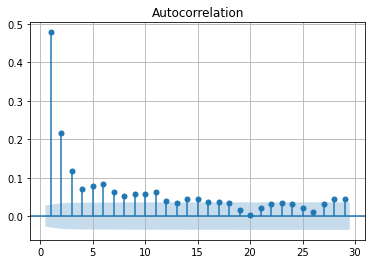

In [42]:
# Volatility Persistence
divseries = query_df[2]['dividend'][0][-20000:-15000]
priceseries = query_df[2]['price'][0][-20000:-15000]
pricecumdiv = query_df[2]['pricecumdiv'][0][-20000:-15000]

residuals = [(pricecumdiv[i+1]/priceseries[i]) - 1 for i in range(len(pricecumdiv)-1)]
residuals -= np.mean(residuals)

_ = plot_acf(residuals**2, lags=np.arange(1, 30))

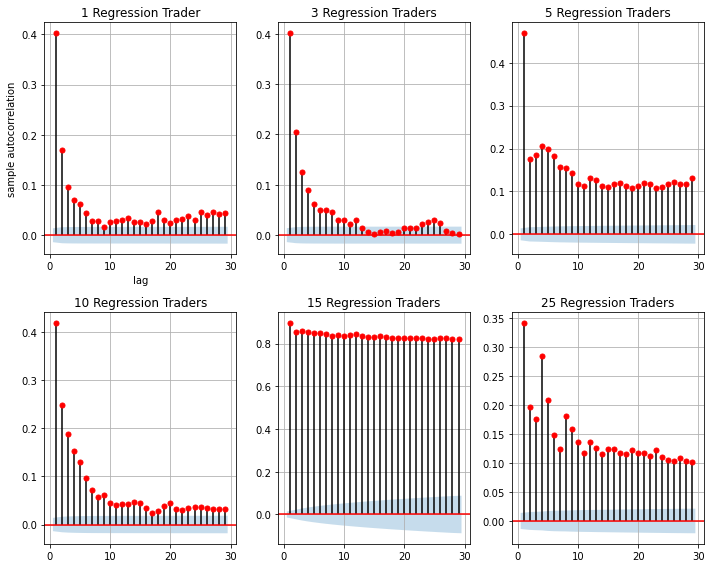

In [33]:
# Volume Persistance
fig, axes = plt.subplots(2,3, figsize=(10, 8))

_ = plot_acf(sema_dfs[0]['volume'][0][:], lags=np.arange(1, 30), ax=axes[0,0], 
             title=f'{len(sema_regtrender[0])} Regression Trader', c='r', vlines_kwargs={"colors": 'black'})
axes[0,0].set_xlabel('lag')
axes[0,0].set_ylabel('sample autocorrelation')

_ = plot_acf(sema_dfs[1]['volume'][0][:], lags=np.arange(1, 30), ax=axes[0,1], 
            title=f'{len(sema_regtrender[1])} Regression Traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[2]['volume'][0][:], lags=np.arange(1, 30), ax=axes[0,2], 
            title=f'{len(sema_regtrender[2])} Regression Traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[3]['volume'][0][:], lags=np.arange(1, 30), ax=axes[1,0],
            title=f'{len(sema_regtrender[3])} Regression Traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[4]['volume'][0][:], lags=np.arange(1, 30), ax=axes[1,1],
            title=f'{len(sema_regtrender[4])} Regression Traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[5]['volume'][0][:], lags=np.arange(1, 30), ax=axes[1,2],
            title=f'{len(sema_regtrender[5])} Regression Traders', c='r', vlines_kwargs={"colors": 'black'})

plt.tight_layout()

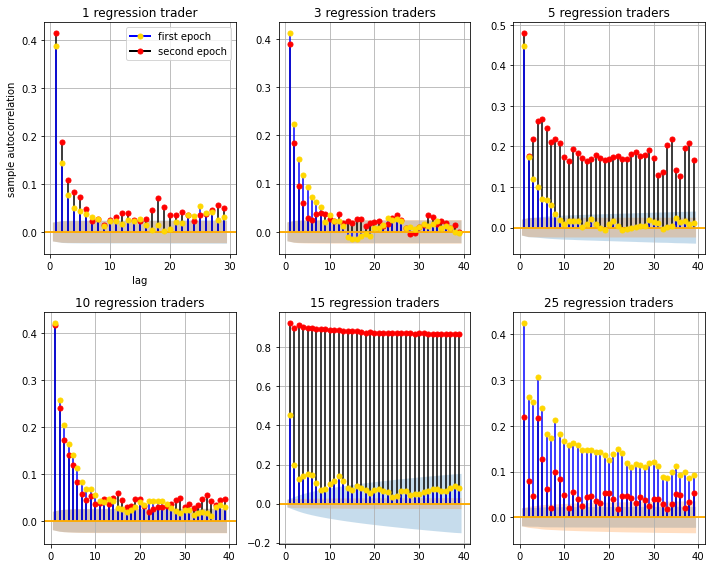

In [70]:
# Volume Persistance
fig, axes = plt.subplots(2,3, figsize=(10, 8))
data_range = slice(10000, 20000)
data_range_2 = slice(0, 10000)
_ = plot_acf(sema_dfs[0]['volume'][0][data_range], lags=np.arange(1, 30), ax=axes[0,0], 
             title=f'{len(sema_regtrender[0])} regression trader', c='r', vlines_kwargs={"colors": 'black'}, 
            label='second epoch')
axes[0,0].set_xlabel('lag')
axes[0,0].set_ylabel('sample autocorrelation')
_ = plot_acf(sema_dfs[0]['volume'][0][data_range_2], lags=np.arange(1, 30), ax=axes[0,0],
             title=f'{len(sema_regtrender[0])} regression trader',
             c='gold', vlines_kwargs={"colors": 'blue'}, label='first epoch')

legend_elements = [plt.Line2D([0], [0], c='b', lw=2., marker='.', 
                              markersize=10, 
                              markerfacecolor='gold', 
                              markeredgecolor='gold', label='first epoch'),
                   plt.Line2D([0], [0], c='black', lw=2., marker='.', 
                              markersize=10, 
                              markerfacecolor='red', 
                              markeredgecolor='red', label='second epoch')]
                   
axes[0,0].legend(handles=legend_elements, loc='upper right')


_ = plot_acf(sema_dfs[1]['volume'][0][data_range], lags=np.arange(1, 40), ax=axes[0,1], 
            title=f'{len(sema_regtrender[1])} regression traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[1]['volume'][0][data_range_2], lags=np.arange(1, 40), ax=axes[0,1], 
            title=f'{len(sema_regtrender[1])} regression traders', c='gold', vlines_kwargs={"colors": 'blue'})

_ = plot_acf(sema_dfs[2]['volume'][0][data_range], lags=np.arange(1, 40), ax=axes[0,2], 
            title=f'{len(sema_regtrender[2])} regression traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[2]['volume'][0][data_range_2], lags=np.arange(1, 40), ax=axes[0,2], 
            title=f'{len(sema_regtrender[2])} regression traders', c='gold', vlines_kwargs={"colors": 'blue'})

_ = plot_acf(sema_dfs[3]['volume'][0][data_range], lags=np.arange(1, 40), ax=axes[1,0],
            title=f'{len(sema_regtrender[3])} regression traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[3]['volume'][0][data_range_2], lags=np.arange(1, 40), ax=axes[1,0], 
            title=f'{len(sema_regtrender[3])} regression traders', c='gold', vlines_kwargs={"colors": 'blue'})

_ = plot_acf(sema_dfs[4]['volume'][0][data_range], lags=np.arange(1, 40), ax=axes[1,1],
            title=f'{len(sema_regtrender[4])} regression traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[4]['volume'][0][data_range_2], lags=np.arange(1, 40), ax=axes[1,1], 
            title=f'{len(sema_regtrender[4])} regression traders', c='gold', vlines_kwargs={"colors": 'blue'})

_ = plot_acf(sema_dfs[5]['volume'][0][data_range], lags=np.arange(1, 40), ax=axes[1,2],
            title=f'{len(sema_regtrender[5])} regression traders', c='r', vlines_kwargs={"colors": 'black'})
_ = plot_acf(sema_dfs[5]['volume'][0][data_range_2], lags=np.arange(1, 40), ax=axes[1,2], 
            title=f'{len(sema_regtrender[5])} regression traders', c='gold', vlines_kwargs={"colors": 'blue'})

plt.tight_layout()
plt.savefig('Pics\Volume acf plot short ewma reg traders.png', dpi=150)

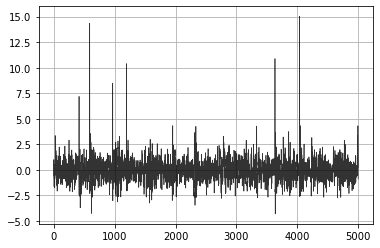

In [31]:
# plot residuals
divseries = query_df[4]['dividend'][0][-10000:-5000]
priceseries = query_df[4]['price'][0][-10000:-5000]
pricecumdiv = query_df[4]['pricecumdiv'][0][-10000:-5000]

y_train = pricecumdiv[1:]
X_train = np.array(pricecumdiv[:-1]).reshape(-1, 1)
residuals = datahandler.find_residuals(y_train, X_train)

plt.plot(residuals, c='black', alpha=0.8, linewidth=0.7)

In [43]:
# calculate realized volatility

def realized_volatility(returns):
    
    returns_squared = np.square(returns)
    rv = np.sqrt(np.sum(returns_squared))
    return rv

realized_volatility(residuals)

1.0952479415810732

<IPython.core.display.Javascript object>


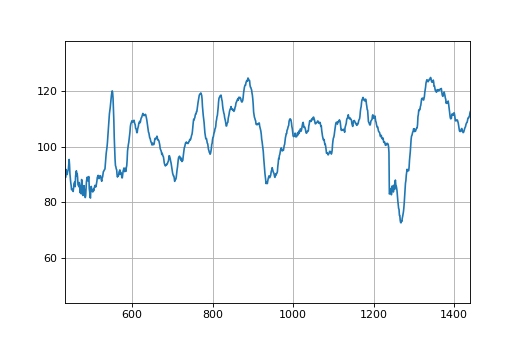

In [33]:
plt.plot(query_df[4]['pricecumdiv'][0][:])

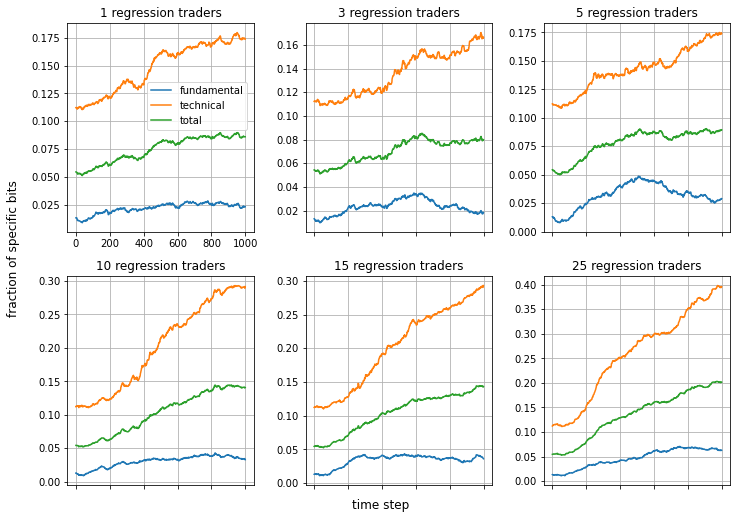

In [7]:
# specific fracs plot

fig = plt.figure(figsize=[10,7])
query_params = mema_params

for k in range(6):
    with sns.color_palette("tab10"):

        ax = fig.add_subplot(2,3,k+1)
        ax.plot([query_params[k][0]['specific fracs'][i]['ga'][0] 
                  for i in range(len(query_params[0][0]['specific fracs']))], label='fundamental')

        ax.plot([query_params[k][0]['specific fracs'][i]['ga'][1] 
                  for i in range(len(query_params[0][0]['specific fracs']))], label='technical')

        ax.plot([query_params[k][0]['specific fracs'][i]['ga'][2] 
                  for i in range(len(query_params[0][0]['specific fracs']))], label='total')
        ax.set_title(f'{len(sema_regtrender[k])} regression traders')
        if k != 0:
            plt.setp(ax.get_xticklabels(), visible=False)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(.2,.75))
fig.text(-.01, 0.5, 'fraction of specific bits', va='center', ha='center', rotation='vertical',fontsize = 12)
fig.text(0.5, -.01, 'time step', va='center', ha='center',fontsize = 12)
plt.tight_layout()
plt.savefig('Pics\medium ewma fraction of specific beat.png', dpi=100, bbox_inches='tight')

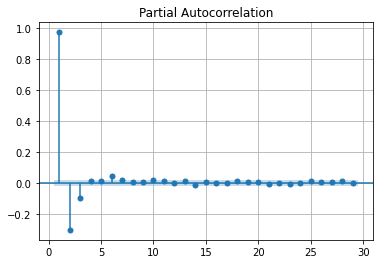

In [20]:
_ = plot_pacf(mema_dfs[5]['pricecumdiv'][0][-10000:], lags=np.arange(1, 30))

Text(0.5, 0.001, 'Sample Size')

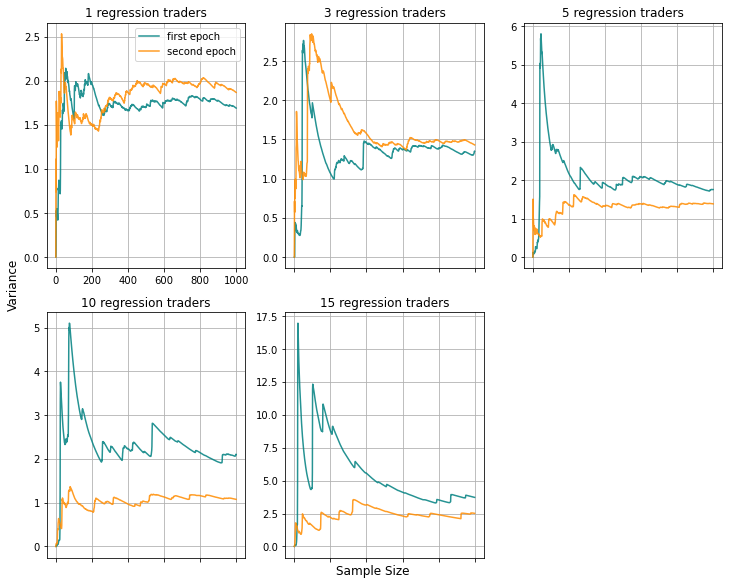

In [14]:
# Variance of Prices with respect to time
%matplotlib inline
sample_size = 1000
query = mema_dfs
fig = plt.figure(figsize=[10,8])
prices = query[0]['price'][0][-20000:-10000]
prices_2 = query[0]['price'][0][-10000:]
ax = fig.add_subplot(231)
ax.plot([np.var([prices[-10000 + i + 1] -  prices[-10000 + i] 
             for i in range(j)]) for j in range(sample_size)], label='first epoch', c='teal', alpha=0.85)
ax.plot([np.var([prices_2[-10000 + i + 1] -  prices_2[-10000 + i] 
             for i in range(j)]) for j in range(sample_size)], label='second epoch', c='darkorange', alpha=0.85)

ax.legend()
ax.set_title(f'{len(mema_regtrender[0])} regression traders')

for k in range(4):
    prices = query[k+1]['price'][0][-20000:-10000]
    prices_2 = query[k+1]['price'][0][-10000:]
    ax = fig.add_subplot(2,3,k+2)
    ax.plot([np.var([prices[-10000 + i + 1] -  prices[-10000 + i] 
                 for i in range(j)]) for j in range(sample_size)],  c='teal', alpha=0.85)
    ax.plot([np.var([prices_2[-10000 + i + 1] -  prices_2[-10000 + i] 
                 for i in range(j)]) for j in range(sample_size)], c='darkorange', alpha=0.85)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_title(f'{len(mema_regtrender[k+1])} regression traders')

plt.tight_layout()

fig.text(0.001, 0.5, 'Variance', va='center', ha='center', rotation='vertical',fontsize = 12)
fig.text(0.5, 0.001, 'Sample Size', va='center', ha='center',fontsize = 12)

# fig.savefig('Pics\s+m+l reg_traders variance against sample size.png', dpi=100, bbox_inches='tight')

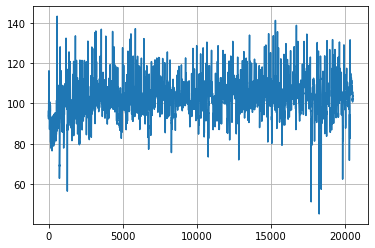

In [18]:
plt.plot(mema_dfs[5]['pricecumdiv'][0][:])
plt.savefig('Pics\sample.pdf')

In [ ]:
for i in range(5):
    res = datahandler.find_residuals(ml_dfs[0]['pricecumdiv'][-10000:])
    find

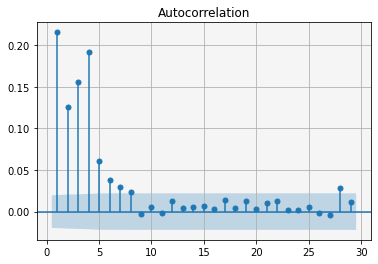

In [20]:

_ = plot_acf(residuals**2, lags = np.arange(1,30))

# Some Stylized Facts

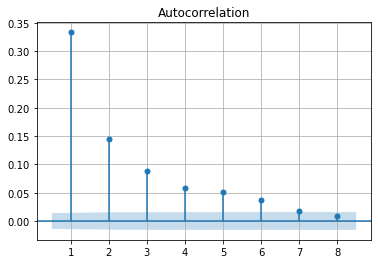

In [66]:
#Volume persistence
%matplotlib inline
_ = plot_acf(mema_dfs[0][0]['volume'], lags=np.arange(1, 9))

In [87]:
# init market more stuff 
with open('Data/SFI_ASM Objects xi_09 more saved stuff', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    
market = unserialized_data[0]
ga_agents = unserialized_data[1]
ga_params = unserialized_data[2]

In [133]:
data

[361.68716976424804,
 342.80191771840634,
 327.3433610472854,
 452.81104130071503,
 398.59950474660417,
 333.1488316090813,
 374.93523177955814,
 385.5438280107305,
 352.2008844569011,
 481.7339778785882,
 478.0610466550395,
 374.608082651313,
 438.8332550834511,
 460.189514517105,
 505.3240953696107,
 532.4536051577495,
 599.217604279189,
 632.4034291886032,
 455.97320754956013,
 418.81106708279117,
 522.6484998739019,
 508.1985941381909,
 477.2041318965032,
 458.31816511320926,
 446.17621889210665,
 431.613799595643,
 494.96983476054066,
 440.09859857987374,
 418.8525291161119,
 429.0089268837971,
 501.2717295430549,
 374.8932274826313,
 436.977662540803,
 399.3265335024792,
 465.6020798066671,
 538.7587656780996,
 553.85903214291,
 594.3556647225273,
 553.1144603269382,
 567.7703823382049,
 595.0083679547816,
 574.6757038327967,
 603.5896878441141,
 529.2259998726446,
 525.393272442683,
 640.4677010348126,
 587.114875302407,
 453.8849410805897,
 472.7925471776391,
 493.6607631950368

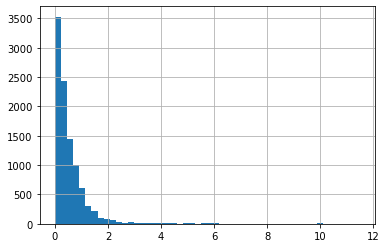

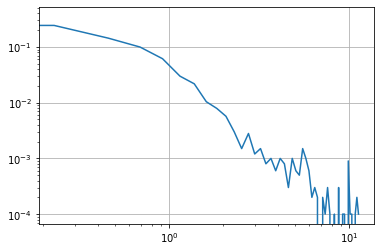

In [169]:
# distribution of volume changes
# _ = plt.hist([sum(mema_params[3][0]['volume'][i * 100:(i+1) * 100]) 
#               for i in range(int(len(mema_params[3][0]['volume'])/100))])

from scipy.stats import binned_statistic
vol_params = ga_params['volume'][-10000:]
data = [sum(vol_params[i * 1:(i+1) * 1]) for i in range(int(len(vol_params)/1))]

a = plt.hist(data, bins=50)
plt.show()
count_bins, bin_mean = a[0], a[1]
vol_densities = [bins/sum(count_bins) for bins in count_bins]
plt.loglog(np.delete(bin_mean, 50), vol_densities)
plt.show()

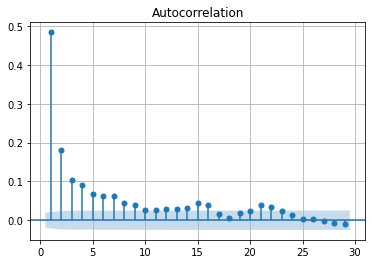

In [90]:
_ = plot_acf(np.array(ga_params['volume'][-10000:]), lags=np.arange(1, 30))

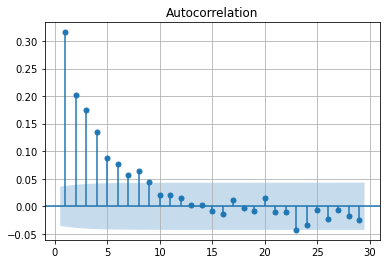

In [104]:
_ = plot_acf(mema_params[3][0]['volume'][0:3000], lags=np.arange(1, 30))

(array([-3, -2, -1,  0,  1,  2,  3]),
 array([-0.00117939, -0.01066861, -0.01977207,  0.06393483,  0.03458241,
        -0.01505826, -0.01988095]),
 <matplotlib.lines.Line2D at 0x1bf8dc5f220>)

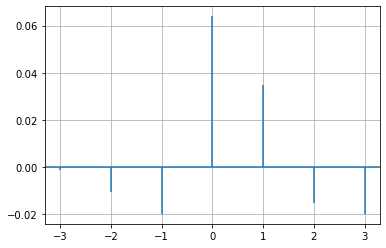

In [111]:
plt.xcorr(np.diff(ga_params['volume'][-10000:]), np.diff(market.priceTimeSeries[-10000:]), maxlags=3)

(array([-3, -2, -1,  0,  1,  2,  3]),
 array([0.79946588, 0.79947301, 0.79953279, 0.79954246, 0.79955068,
        0.79958347, 0.799532  ]),
 <matplotlib.lines.Line2D at 0x1bf8dc17070>)

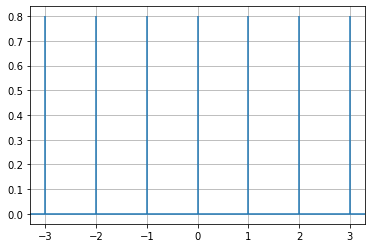

In [109]:
plt.xcorr(sema_dfs[3]['price'][0][:10000], sema_params[3][0]['volume'][:10000], maxlags=3)

(array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
        -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
         22,  23,  24,  25,  26,  27,  28,  29,  30]),
 array([-0.00959322,  0.01168717,  0.02244432, -0.00071327, -0.01048538,
         0.00416791, -0.00046827, -0.00609942, -0.00869958,  0.00862928,
         0.00294162, -0.00614404,  0.00095943, -0.00659   ,  0.00352277,
        -0.00290695,  0.00744491, -0.00082636, -0.00416983,  0.01266397,
        -0.00654778,  0.00818981, -0.01670685,  0.01130911, -0.00357318,
         0.02811803, -0.01732809, -0.00677913,  0.00735139, -0.0013564 ,
         0.00435575, -0.01391422,  0.00702529, -0.00026961,  0.01415875,
        -0.01892865,  0.00021498, -0.00283878, -0.00151057, -0.00474705,
         0.01358969,  0.00793647, -0.01060961,  0.00479017, -0.008091

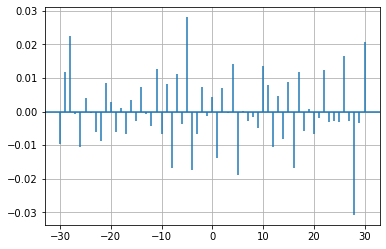

In [117]:
price_changes = np.diff(sema_dfs[3]['price'][0])
volume_changes = np.diff(sema_params[3][0]['volume'])
plt.xcorr(price_changes[:10000], volume_changes[:10000], maxlags=30)

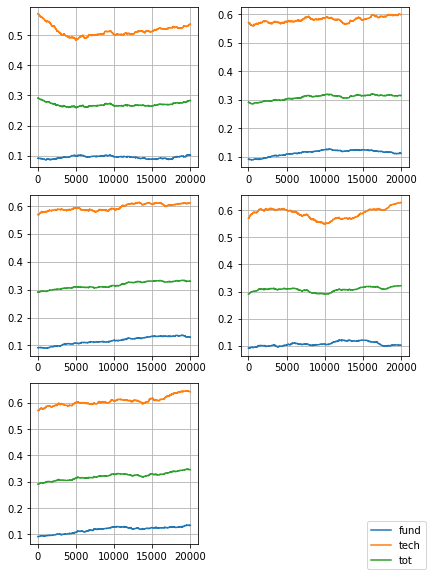

In [163]:
fig = plt.figure(figsize=(6,8))

for n in range(5):
    ax = fig.add_subplot(3,2,n+1)
    ax.plot([ml_params[n][0]['specific fracs'][i]['ga'][0] for i in range(20000)], label='fund')
    ax.plot([ml_params[n][0]['specific fracs'][i]['ga'][1] for i in range(20000)], label='tech')
    ax.plot([ml_params[n][0]['specific fracs'][i]['ga'][2] for i in range(20000)], label='tot')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')
plt.tight_layout()

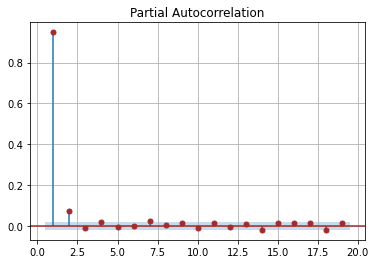

In [116]:
%matplotlib inline
_ = plot_pacf(np.add(init_market.priceTimeSeries[-10000:], init_market.divTimeSeries[-10000:]), 
              lags=np.arange(1,20), color='brown')

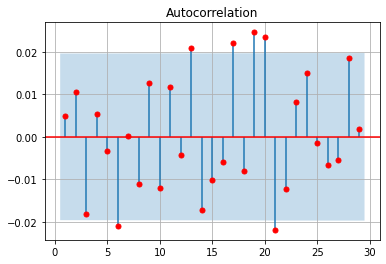

In [129]:
from sklearn import linear_model

data = np.add(init_market.priceTimeSeries[-10000:], init_market.divTimeSeries[-10000:])
y_train = np.array(data[2:])
X_train = np.array(data[1:-1]).reshape(-1, 1)
X_train = np.c_[X_train, init_market.priceTimeSeries[-10000:-2]]

reg = linear_model.LinearRegression().fit(X_train, y_train,)
y_pred = reg.predict(X_train)
res = y_pred - y_train

_ = plot_acf(res, color='red', lags= np.arange(1,30))

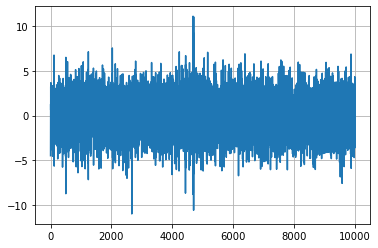

 gamma_res(1) = 0.004957746759765173
 gamma_res_squared(1) = 0.14586248362554943
 Lagrange multiplier statistic = 625.227254175513, ARCH F-statistic = 55.51587251120381
 std = 2.075581822892918
 kurtosis = 0.5473381726200883


In [131]:
plt.plot(res)
plt.show()

print(f' gamma_res(1) = {datahandler.sample_autocorrelation(res, 1)}')
print(f' gamma_res_squared(1) = {datahandler.sample_autocorrelation(res**2, 1)}')      
print(f' Lagrange multiplier statistic = {datahandler.arch(res)[0]},'
      f' ARCH F-statistic = {datahandler.arch(res)[2]}')
print(f' std = {datahandler.std(res)}')
print(f' kurtosis = {datahandler.kurtosis(res)}')

<IPython.core.display.Javascript object>


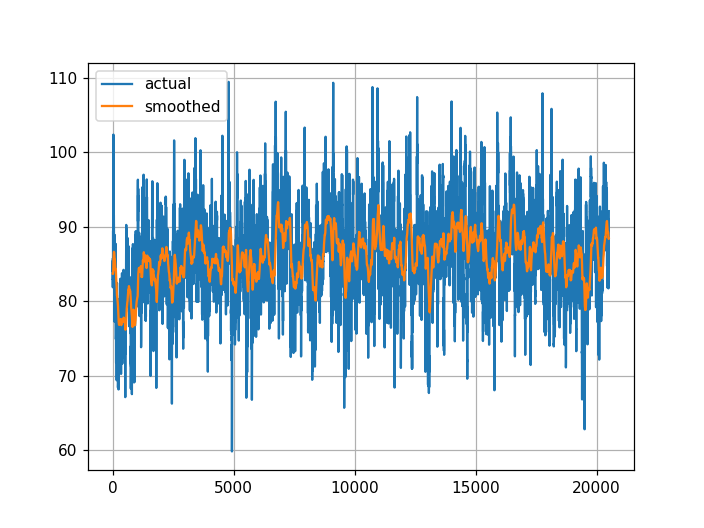

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

fit1 = SimpleExpSmoothing(dfs[0]['price'][0], initialization_method="heuristic").fit(smoothing_level=0.01,
                                                                                     optimized=True)

plt.plot(dfs[0]['price'][0], label='actual')
plt.plot(fit1.fittedvalues, label='smoothed')
plt.legend()

<IPython.core.display.Javascript object>


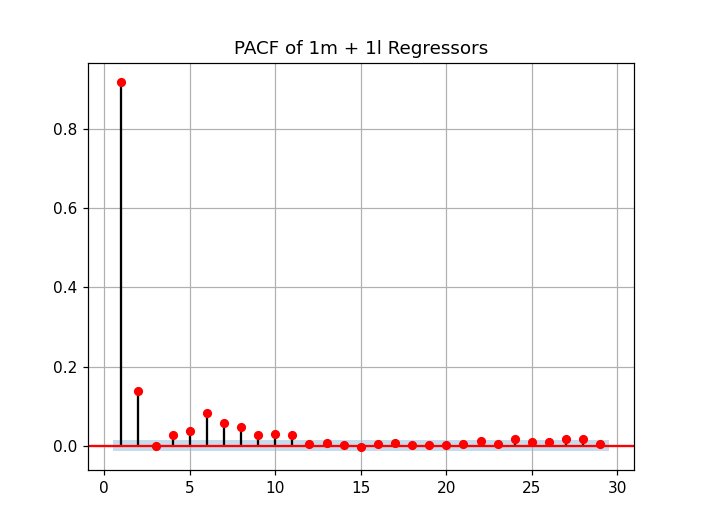

<IPython.core.display.Javascript object>


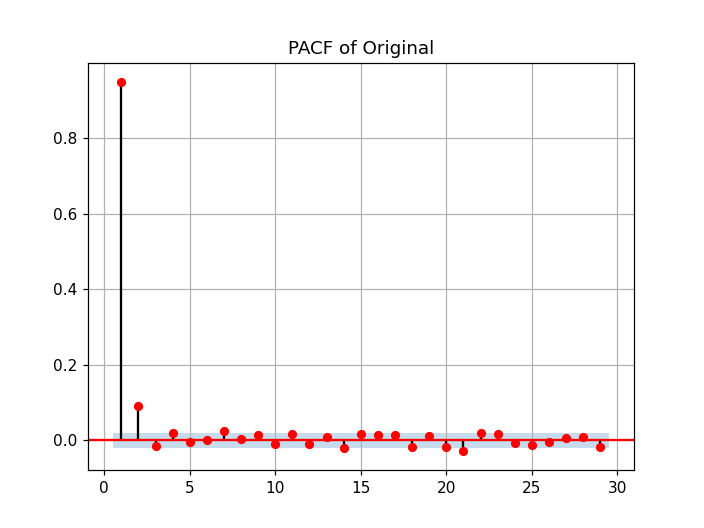

Text(0.5, 1.0, 'PACF of Original')

In [88]:
plot_pacf(dfs[2]['price'][0][-20000:], lags = np.arange(1,30), color='red', vlines_kwargs={"colors": 'black'})
plt.title('PACF of 1m + 1l Regressors')

plot_pacf(init_market.priceTimeSeries[-10000:], lags = np.arange(1,30), color='red', vlines_kwargs={"colors": 'black'})
plt.title('PACF of Original')

In [69]:
plot_pacf(sml_dfs[1]['price'][0][-20000:-19000], lags = np.arange(1,30), color='red', vlines_kwargs={"colors": 'black'})
plt.title('PACF of 1s + 1m + 1l Regressors')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'PACF of 1s + 1m + 1l Regressors')

<IPython.core.display.Javascript object>


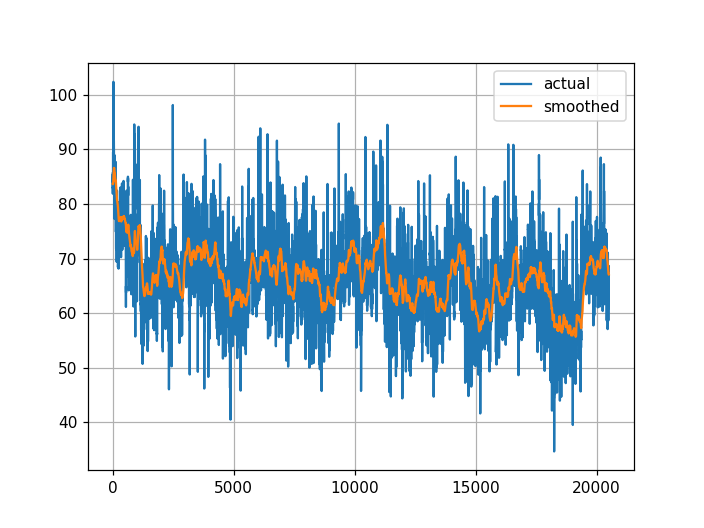

In [85]:
fit1 = SimpleExpSmoothing(dfs[2]['price'][0], initialization_method="heuristic").fit(smoothing_level=0.01,
                                                                                     optimized=True)

plt.plot(dfs[2]['price'][0], label='actual')
plt.plot(fit1.fittedvalues, label='smoothed')
plt.legend()

In [80]:
datahandler.adf_gls(dfs[2]['price'][0])

      Dickey-Fuller GLS Results      
Test Statistic                 -3.081
P-value                         0.002
Lags                               42
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
